In [1]:
import specdist as pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import interp1d
from matplotlib.pyplot import cm
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.collections import LineCollection
from matplotlib.ticker import LogLocator
import re
scientific_notation = pi.scientific_notation

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

import warnings; warnings.simplefilter('ignore')

path_to_figures = "/Users/boris/Work/SPECTRAL-DISTORTIONS/figures/"

xinj_to_mass = 4.698e-4 #m in ev = 4.698e-4 xinj
#1./4.698e-4*2. = 4257.130693912303

# sd_lib_bare = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('bare',sd_lib_bare)


# sd_lib_lyc = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('lyc',sd_lib_lyc)

# sd_lib_lyc_reio = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('lyc_reio',sd_lib_lyc_reio)




label_y_firas = r'$y_\mathrm{COBE}=1.5\times 10^{-5}$'
label_mu_firas = r'$\mu_\mathrm{COBE}=9\times 10^{-5}$'
label_fdm = 'Effective Dark Matter Fraction, '+r'$\epsilon f_\mathrm{dm}$'
label_mdm = 'Particle Mass, ' +r'$m_\mathrm{dm}\,\,[\mathrm{eV}]$'
label_xe = 'Free Electron Fraction, '+r'$X_\mathrm{e}$'
label_redshift = 'Redshift, '+r'$z$'
label_mu_dist =  'Chemical Potential, '+r'$\mu$'
label_injection_frequency = "Scaled Injection Frequency, "+ r'$x_{\mathrm{inj,0}}$'
label_scaled_frequency = "Scaled Frequency, "+ r'$x=h\nu/k_{_\mathrm{B}}T_{_\mathrm{CMB}}$'
label_frequency_in_GHz = "Frequency,  "+ r'$\nu \quad [\mathrm{GHz}]$'
label_intensity = "Intensity, "+r'$\Delta I_x \quad [\mathrm{Jy/sr}]$'
label_intensity_kJy = "Intensity, "+r'$\Delta I_x \quad [\mathrm{kJy/sr}]$'
label_injection_energy = "Injection Energy, "+ r'$E_{\mathrm{inj,0}}$' + " [eV]"
xinj_to_Einj = 4.698e-4/2.
label_Gamma = "Decay Rate, "+r"$\Gamma_X\quad[\mathrm{s^{-1}}]$"

label_zX = "Maximum Injection Redshift, "+ r'$z_X$'
sd = pi

label_Gamma_stim = r"$\Gamma_X^\mathrm{stim}/\Gamma_X=[1+2n_\mathrm{Pl}(x_\mathrm{inj})]$"

label_zX = "Maximum Injection Redshift, "+ r'$z_X$'
label_Tau_x = "Lifetime,  "+r'$\tau_X\quad[\mathrm{s}]$'

label_log10Tau_x = "Lifetime,  "+r'$\mathrm{log}_{10}(\tau_X/\,1\mathrm{s})$'
label_Tau_x = "Lifetime,  "+r'$\tau_X\quad[\mathrm{s}]$'
label_log10injection_energy = "Injection Energy, "+ r'$\mathrm{log}_{10}(E_{\mathrm{inj,0}}/\,1\mathrm{eV})$'
label_log10mdm = 'Particle Mass, ' +r'$\mathrm{log}_{10}(m_\mathrm{X}/\,1\mathrm{eV})$'

def get_fdm_constraints_at_Gamma_and_xinj(gamma_p,xinj_p,*args,**kwargs):
    a_lib = kwargs['sd_lib']
    f_dm_fisher = sd.pi_run_fisher_constraints([gamma_p],[xinj_p],**kwargs)
    fdm_value = f_dm_fisher['curves'][0]['fdm'][0]
    #x_asked = np.logspace(np.log10(1e-8),np.log10(1e8),3000)
    #fdm_value = GetSpectra(gamma_p,xinj_p,x_asked,a_lib,get_fisher_fdm='yes',use_edges='yes')["fisher_fdm"]
    fdm_pca_value_ct = np.nan
    fdm_pca_value_rf = np.nan
    if gamma_p < 1e-12:
        # using recfast:
        #f_dm_pca = pi_run_pca_constraints_with_recfast([xinj_p],[gamma_p],fdm_value,**kwargs)
        #fdm_pca_value_rf = f_dm_pca['curves'][0]['fdm'][0]
        
        # using CT:
        z_asked = np.logspace(np.log10(1e-2),np.log10(4000),5000)
        S_xe_history = sd.GetXeHistory(gamma_p,xinj_p,z_asked,a_lib)
        fdm_pca_value_ct = S_xe_history['fdm_pca_lim']
    r_dict = {}
    r_dict['fdm_fisher'] = fdm_value
    r_dict['fdm_Xe_pca_rf'] = fdm_pca_value_rf
    r_dict['fdm_Xe_pca_ct'] = fdm_pca_value_ct
    return r_dict




In [2]:
photon_injection_case = 'bare'
sd_lib = sd.specdist_ct_spectra_lib()
sd.load_ct_spectra_lib(photon_injection_case,sd_lib)
sd_lib_bare = sd_lib



In [3]:
sd_lib_lyc_reio = pi.specdist_ct_spectra_lib()
pi.load_ct_spectra_lib('lyc_reio',sd_lib_lyc_reio)

In [4]:
sd_lib_lyc_reio_extended = pi.specdist_ct_spectra_lib()
pi.load_ct_spectra_lib('extended_run_xe_history_Drho_rho_3e-5_zlate_1e3_without_collision_190820',sd_lib_lyc_reio_extended)

In [5]:
Nx = 400
xi_array = np.logspace(-6,6,Nx)

Gamma_values = [1e-9,1e-11,1e-13,1e-14,1e-17,1.e-20]
gamma_labels = [r'$10^{-9}$',r'$10^{-11}$',r'$10^{-13}$',r'$10^{-14}$',r'$10^{-17}$',r'$10^{-20}$']




firas = sd.firas()
edges = sd.edges()
a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges
a_dict['add_edges'] = 'no'

# Gamma_values = np.logspace(-17,-8,3)
# for gammas in Gamma_values:
#     xi_array = np.logspace(-16,-10,100)
#     D = sd.pi_run_fisher_constraints([gammas],xi_array,sd_lib_bare,**a_dict)
#     #print(D['curves'][0]['fdm'])
f_dm_fisher_lyc_reio_extended = sd.pi_run_fisher_constraints(Gamma_values,xi_array,sd_lib_lyc_reio_extended,**a_dict)
f_dm_fisher_lyc_reio = sd.pi_run_fisher_constraints(Gamma_values,xi_array,sd_lib_lyc_reio,**a_dict)
f_dm_fisher_bare = sd.pi_run_fisher_constraints(Gamma_values,xi_array,sd_lib_bare,**a_dict)

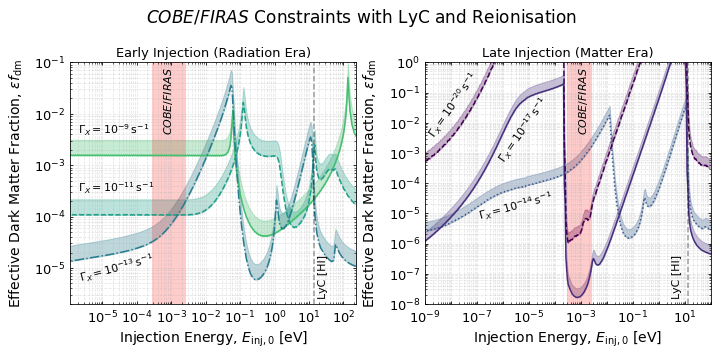

In [6]:
photon_injection_case = 'lyc_reio'
if photon_injection_case == 'bare':
    f_dm_fisher = f_dm_fisher_bare
    case = 'bare'
if photon_injection_case == 'lyc':
    f_dm_fisher = f_dm_fisher_lyc
    case = 'lyc'
if photon_injection_case == 'lyc_reio':
    f_dm_fisher = f_dm_fisher_lyc_reio_extended
    case = 'lyc+reio'

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

mklist = iter(['o','s','d','v','>','o','s','d','v','>','>'])
#colors = iter(['grey','forestgreen','b','purple','k','r','b','green','grey','k'])

lstyles = iter(['-','--','-.',':','-','--','-.',':','-','--','-.',':','-'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
label_size = 13
title_size = 14
legend_size = 25
handle_length = 1.5

for ax in (ax1,ax2):
    ax.set_xscale('log')
    ax.set_yscale('log')


    ax.set_ylabel(label_fdm,size=title_size)
    ax.set_xlabel(label_injection_energy,size=title_size)
    ax.yaxis.set_label_coords(-.16,0.5)


    ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(True) #(3)

    ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
    ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
    ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
    ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

    # manipulate x-axis ticks and labels
    ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        if ax == ax1:
            label.set_visible(True)
        if ax == ax2:
            label.set_visible(False)

    ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

    
    
    #ax.axvspan(1.e-3*xinj_to_Einj, 2e-3*xinj_to_Einj,ymin=0.,ymax=0.1, facecolor='blue', alpha=0.2,label=r'$\mathrm{EDGES}$')
    #ax.axvspan(0.5*xinj_to_Einj, 105*xinj_to_Einj,ymin=0.,ymax=0.1,  facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
    ax.axvspan(1.2*xinj_to_Einj, 11.2*xinj_to_Einj,ymin=0.,ymax=1, facecolor='red', alpha=0.2)
    
i = 0
#color=iter(cm.viridis(np.linspace(0.7,0,len(Gamma_values))))
colors=iter(cm.viridis(np.linspace(0.7,0.,6)))
for gamma in np.flip(Gamma_values):

    col = next(colors)
    mk = next(mklist)
    ls = next(lstyles)

    #ax.plot(f_dm_high_z['curves'][i]['x'],f_dm_high_z['curves'][i]['mu'],c=col,label=r'$\Gamma_X=$'+scientific_notation(f_dm_high_z['Gamma_inj'][i])+r'$\,\mathrm{s^{-1}}$',ls='None', marker=mk,markersize=3)
    if i<=2:
        f_dm_fisher = f_dm_fisher_lyc_reio
        ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],f_dm_fisher['curves'][i]['fdm'],
                 c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=ls)#, marker=,markersize=3)
        ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-f_dm_fisher['curves'][i]['fdm'],
                 c=col,ls=ls)#, marker=mk,markersize=3)
        ax1.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], 
                         np.abs(f_dm_fisher['curves'][i]['fdm']),2.*np.abs(f_dm_fisher['curves'][i]['fdm']),color=col,alpha=0.3)
    if i>2:
        f_dm_fisher = f_dm_fisher_lyc_reio_extended
        ax2.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],
                 f_dm_fisher['curves'][i]['fdm'],
                 c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=ls)#, marker=mk,markersize=3,markerfacecolor='None')
        ax2.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-f_dm_fisher['curves'][i]['fdm'],
                 c=col,ls=ls)#, marker=mk,markersize=3,markerfacecolor='None')
        ax2.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], 
                         np.abs(f_dm_fisher['curves'][i]['fdm']),
                         2.*np.abs(f_dm_fisher['curves'][i]['fdm']),
                         color=col,alpha=0.3)


    i += 1

#ax2.text(0.05, 0.95, case , transform=ax2.transAxes, fontsize=9, verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='white', alpha=0.6))

#ax1.text(0.05, 0.95, case , transform=ax1.transAxes, fontsize=9, verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='white', alpha=0.6))

ax1.set_ylim(3.e-6,1e-1)
ax1.set_xlim(xinj_to_Einj*5e-3,xinj_to_Einj*1e6)

ax2.set_ylim(1.e-10,1e0)
ax2.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)

#leg1 = plt.legend(loc=3,ncol=2,frameon=True,framealpha=0.6,fontsize = 9)
#legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
#                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
#ax1.legend(loc=3,ncol=1,frameon=True,framealpha=1.,fontsize = 7)
#ax2.legend(loc=3,ncol=1,frameon=True,framealpha=1.,fontsize = 7)

if 'lyc' in photon_injection_case:
    ax2.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
    ax2.text(0.865, 0.02, 'LyC [HI]' , transform=ax2.transAxes, fontsize=11,
             verticalalignment='bottom',rotation = 90)
    ax1.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
    ax1.text(0.865, 0.02, 'LyC [HI]' , transform=ax1.transAxes, fontsize=11,
             verticalalignment='bottom',rotation = 90)
ax1.set_title(r'Early Injection (Radiation Era)',fontsize=13)
ax2.set_title(r'Late Injection (Matter Era)',fontsize=13)
ax1.text(0.322, 0.7, r'$COBE/FIRAS$' , transform=ax1.transAxes, fontsize=11,
         verticalalignment='bottom',rotation = 90)
ax2.text(0.53, 0.7, r'$COBE/FIRAS$' , transform=ax2.transAxes, fontsize=11,
         verticalalignment='bottom',rotation = 90)
# ax.add_artist(leg2).tight_layout(pad=3.0)

plt.subplots_adjust(left=0.2,wspace=0)
ax2.set_xlim(1e-9,1e2)
ax1.set_ylim(2e-6,1e-1)
ax2.set_ylim(1e-8,1e0)
plt.suptitle(r'$COBE/FIRAS$ Constraints with LyC and Reionisation',size=17)



ax1.text(2e-6,4e-3,r'$\Gamma_X=10^{-9}\,\mathrm{s}^{-1}$',size=11,rotation=0)
ax1.text(2e-6,3.e-4,r'$\Gamma_X=10^{-11}\,\mathrm{s}^{-1}$',size=11,rotation=0)
ax1.text(2e-6,5.5e-6,r'$\Gamma_X=10^{-13}\,\mathrm{s}^{-1}$',size=11,rotation=15)


ax2.text(1e-9,3.5e-3,r'$\Gamma_X=10^{-20}\,\mathrm{s}^{-1}$',size=11,rotation=55)
ax2.text(5e-7,5e-4,r'$\Gamma_X=10^{-17}\,\mathrm{s}^{-1}$',size=11,rotation=55)
ax2.text(1e-7,6e-6,r'$\Gamma_X=10^{-14}\,\mathrm{s}^{-1}$',size=11,rotation=15)

fig.tight_layout(rect=[0, 0.0, 1, 0.9])
plt.savefig(path_to_figures + '/figures_for_paper_fdm_fisher_'+photon_injection_case+'_extended.pdf')
plt.show()
plt.close(fig)

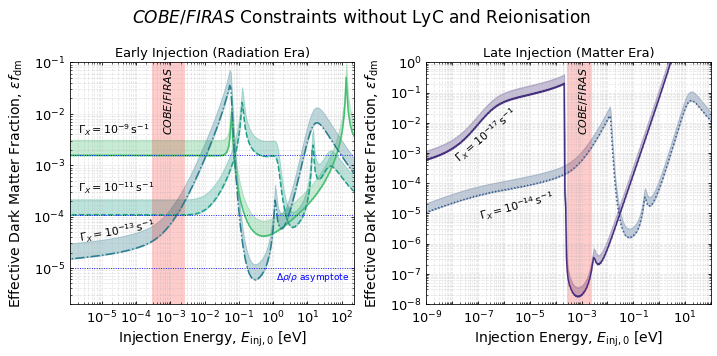

In [40]:
photon_injection_case = 'bare'
if photon_injection_case == 'bare':
    f_dm_fisher = f_dm_fisher_bare
    case = 'bare'
if photon_injection_case == 'lyc':
    f_dm_fisher = f_dm_fisher_lyc
    case = 'lyc'
if photon_injection_case == 'lyc_reio':
    f_dm_fisher = f_dm_fisher_lyc_reio_extended
    case = 'lyc+reio'

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

mklist = iter(['o','s','d','v','>','o','s','d','v','>','>'])
#colors = iter(['grey','forestgreen','b','purple','k','r','b','green','grey','k'])

lstyles = iter(['-','--','-.',':','-','--','-.',':','-','--','-.',':','-'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
label_size = 13
title_size = 14
legend_size = 25
handle_length = 1.5

for ax in (ax1,ax2):
    ax.set_xscale('log')
    ax.set_yscale('log')


    ax.set_ylabel(label_fdm,size=title_size)
    ax.set_xlabel(label_injection_energy,size=title_size)
    ax.yaxis.set_label_coords(-.16,0.5)


    ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(True) #(3)

    ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
    ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
    ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
    ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

    # manipulate x-axis ticks and labels
    ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        if ax == ax1:
            label.set_visible(True)
        if ax == ax2:
            label.set_visible(False)

    ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

    
    
    #ax.axvspan(1.e-3*xinj_to_Einj, 2e-3*xinj_to_Einj,ymin=0.,ymax=0.1, facecolor='blue', alpha=0.2,label=r'$\mathrm{EDGES}$')
    #ax.axvspan(0.5*xinj_to_Einj, 105*xinj_to_Einj,ymin=0.,ymax=0.1,  facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
    ax.axvspan(1.2*xinj_to_Einj, 11.2*xinj_to_Einj,ymin=0.,ymax=1, facecolor='red', alpha=0.2)
    
i = 0
#color=iter(cm.viridis(np.linspace(0.7,0,len(Gamma_values))))
colors=iter(cm.viridis(np.linspace(0.7,0.,6)))
for gamma in np.flip(Gamma_values):

    col = next(colors)
    mk = next(mklist)
    ls = next(lstyles)

    #ax.plot(f_dm_high_z['curves'][i]['x'],f_dm_high_z['curves'][i]['mu'],c=col,label=r'$\Gamma_X=$'+scientific_notation(f_dm_high_z['Gamma_inj'][i])+r'$\,\mathrm{s^{-1}}$',ls='None', marker=mk,markersize=3)
    if i<=2:
        ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],f_dm_fisher['curves'][i]['fdm'],
                 c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=ls)#, marker=,markersize=3)
        ax1.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-f_dm_fisher['curves'][i]['fdm'],
                 c=col,ls=ls)#, marker=mk,markersize=3)
        ax1.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], 
                         np.abs(f_dm_fisher['curves'][i]['fdm']),2.*np.abs(f_dm_fisher['curves'][i]['fdm']),color=col,alpha=0.3)
    if i>2:
        ax2.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],
                 f_dm_fisher['curves'][i]['fdm'],
                 c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=ls)#, marker=mk,markersize=3,markerfacecolor='None')
        ax2.plot(xinj_to_Einj*f_dm_fisher['curves'][i]['x'],-f_dm_fisher['curves'][i]['fdm'],
                 c=col,ls=ls)#, marker=mk,markersize=3,markerfacecolor='None')
        ax2.fill_between(xinj_to_Einj*f_dm_fisher['curves'][i]['x'], 
                         np.abs(f_dm_fisher['curves'][i]['fdm']),
                         2.*np.abs(f_dm_fisher['curves'][i]['fdm']),
                         color=col,alpha=0.3)


    i += 1

#ax2.text(0.05, 0.95, case , transform=ax2.transAxes, fontsize=9, verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='white', alpha=0.6))

#ax1.text(0.05, 0.95, case , transform=ax1.transAxes, fontsize=9, verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='white', alpha=0.6))

ax1.set_ylim(3.e-6,1e-1)
ax1.set_xlim(xinj_to_Einj*5e-3,xinj_to_Einj*1e6)

ax2.set_ylim(1.e-10,1e0)
ax2.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)

#leg1 = plt.legend(loc=3,ncol=2,frameon=True,framealpha=0.6,fontsize = 9)
#legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
#                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
#ax1.legend(loc=3,ncol=1,frameon=True,framealpha=1.,fontsize = 7)
#ax2.legend(loc=3,ncol=1,frameon=True,framealpha=1.,fontsize = 7)

if 'lyc' in photon_injection_case:
    ax2.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
    ax2.text(0.865, 0.02, 'LyC [HI]' , transform=ax2.transAxes, fontsize=11,
             verticalalignment='bottom',rotation = 90)
    ax1.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
    ax1.text(0.865, 0.02, 'LyC [HI]' , transform=ax1.transAxes, fontsize=11,
             verticalalignment='bottom',rotation = 90)
ax1.set_title(r'Early Injection (Radiation Era)',fontsize=13)
ax2.set_title(r'Late Injection (Matter Era)',fontsize=13)
ax1.text(0.322, 0.7, r'$COBE/FIRAS$' , transform=ax1.transAxes, fontsize=11,
         verticalalignment='bottom',rotation = 90)
ax2.text(0.53, 0.7, r'$COBE/FIRAS$' , transform=ax2.transAxes, fontsize=11,
         verticalalignment='bottom',rotation = 90)
# ax.add_artist(leg2).tight_layout(pad=3.0)

plt.subplots_adjust(left=0.2,wspace=0)
ax2.set_xlim(1e-9,1e2)
ax1.set_ylim(2e-6,1e-1)
ax2.set_ylim(1e-8,1e0)
plt.suptitle(r'$COBE/FIRAS$ Constraints without LyC and Reionisation',size=17)


ax1.text(2e-6,3.e-4,r'$\Gamma_X=10^{-11}\,\mathrm{s}^{-1}$',size=11,rotation=0)

ax1.text(2e-6,3.2e-5,r'$\Gamma_X=10^{-13}\,\mathrm{s}^{-1}$',size=11,rotation=10)

ax1.text(2e-6,4e-3,r'$\Gamma_X=10^{-9}\,\mathrm{s}^{-1}$',size=11,rotation=0)

ax1.text(1.2e0,5.95e-6,r'$\Delta{\rho}/{\rho}$ asymptote',size=9,rotation=0,c='blue')


ax1.axhline(1.55e-3,c='blue',ls=':',lw=0.9)
ax1.axhline(1.05e-4,c='blue',ls=':',lw=0.9)
ax1.axhline(9.95e-6,c='blue',ls=':',lw=0.9)


#ax2.text(1e-9,3.5e-3,r'$\Gamma_X=10^{-20}\,\mathrm{s}^{-1}$',size=11,rotation=55)
ax2.text(1e-8,5e-4,r'$\Gamma_X=10^{-17}\,\mathrm{s}^{-1}$',size=11,rotation=40)

ax2.text(1e-7,6e-6,r'$\Gamma_X=10^{-14}\,\mathrm{s}^{-1}$',size=11,rotation=15)

fig.tight_layout(rect=[0, 0.0, 1, 0.9])
plt.savefig(path_to_figures + '/figures_for_paper_fdm_fisher_'+photon_injection_case+'.pdf')
plt.show()
plt.close(fig)

# Constraints figure 1d

In [45]:
sd_lib_extended_run = pi.specdist_ct_spectra_lib()
#pi.load_ct_spectra_lib('extended_run_xe_history_120820',sd_lib_extended_run)
#extended_run_xe_history_Drho_rho_5e-6_no_collision_160820
pi.load_ct_spectra_lib('extended_run_xe_history_Drho_rho_3e-5_zlate_1e3_without_collision_190820',sd_lib_extended_run)



In [51]:
sd_lib = sd_lib_extended_run


Nx = 300
xi_array = np.logspace(-6,6,Nx)

Gamma_values = [1e-11,1e-14,1e-17]
gamma_labels = [r'$10^{-11}$',r'$10^{-14}$',r'$10^{-17}$']






firas = sd.firas()
edges = sd.edges()
a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges
a_dict['add_edges'] = 'yes'

f_dm_fisher_lyc_reio_with_edges = sd.pi_run_fisher_constraints(Gamma_values,xi_array,sd_lib,**a_dict)

a_dict['add_edges'] = 'no'

f_dm_fisher_lyc_reio_no_edges = sd.pi_run_fisher_constraints(Gamma_values,xi_array,sd_lib,**a_dict)





In [52]:
firas = sd.firas()
edges = sd.edges()
a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges
a_dict['add_edges'] = 'yes'
a_dict['PCA_modes'] = sd.Xe_PCA_EigenModes()
a_dict['store_DXe_Xe'] = 'no'
rf = sd.recfast()
rf.rf_zstart = 1e6
rf.rf_zend = 1e-5
rf.rf_include_correction_function = 0
rf.rf_Reionization_model = 1
rf.rf_T0 = 2.7255
rf.rf_Yp = 0.245407
rf.rf_N_eff = 3.046
rf.rf_Omega_m = 0.312331
rf.rf_Omega_b = 0.0491137
rf.rf_h = 0.675422

a_dict['recfast'] = rf
a_dict['sd_lib'] = sd_lib_extended_run


fdm_wpca = []
for gamma in Gamma_values:
    
    r_dict = {}
    
    
    fdm_fisher = []
    fdm_pca_rf = []
    fdm_pca_ct = []
    xfisher = []
    xpca = []
    xjoint = []
    fdm_joint = []
    print(gamma)
    for xinj in xi_array:

        fdm_results = get_fdm_constraints_at_Gamma_and_xinj(gamma,xinj,**a_dict)
        yfisher = fdm_results['fdm_fisher']
        ypca = fdm_results['fdm_Xe_pca_ct']
        if not np.isnan(yfisher):
            xfisher.append(xinj)
            fdm_fisher.append(yfisher)
        if not np.isnan(ypca):
            xpca.append(xinj)
            fdm_pca_ct.append(ypca)
        
        if np.isnan(ypca) and not np.isnan(yfisher):
            yjoint = yfisher
        elif not np.isnan(ypca) and np.isnan(yfisher):
            yjoint = ypca
        elif not np.isnan(ypca) and not np.isnan(yfisher): 
            yjoint = min(ypca,yfisher)
        else:
            yjoint = np.nan
        if not np.isnan(yjoint):
            xjoint.append(xinj)
            fdm_joint.append(yjoint)
            
    #fdm_pca_rf.append(fdm_results['fdm_Xe_pca_rf'])
    xfisher =np.asarray(fdm_fisher) 
    fdm_fisher = np.asarray(fdm_fisher)
    #fdm_pca_rf = np.asarray(fdm_pca_rf)
    xpca = np.asarray(xpca)
    fdm_pca_ct = np.asarray(fdm_pca_ct)
    
    xjoint = np.asarray(xjoint)
    fdm_joint = np.asarray(fdm_joint)
    
    r_dict['xfisher'] = xfisher
    r_dict['fdm_fisher'] = fdm_fisher
    r_dict['xpca_ct'] = xpca
    r_dict['fdm_pca_ct'] = fdm_pca_ct
    r_dict['xjoint'] = xjoint
    r_dict['fdm_joint'] = fdm_joint

    fdm_wpca.append(r_dict)





1e-11
1e-14
1e-17


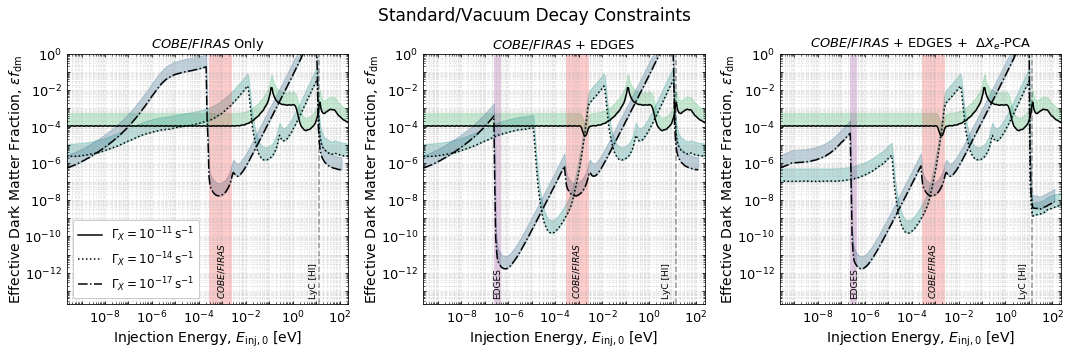

In [76]:
# photon_injection_case = 'bare'
# if photon_injection_case == 'bare':
#     f_dm_fisher = f_dm_fisher_bare
#     case = 'bare'
# if photon_injection_case == 'lyc':
#     f_dm_fisher = f_dm_fisher_lyc
#     case = 'lyc'
# if photon_injection_case == 'lyc_reio':
photon_injection_case = 'extended_run'
#     f_dm_fisher = f_dm_fisher_lyc_reio
#  
case = 'extended run'

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

mklist = iter(['o','s','d','v','>','o','s','d','v','>'])
#colors=iter(['r','b','k'])
colors=iter(cm.viridis(np.linspace(0.7,0.,5)))

lstyles = iter(['-',':','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
label_size = 13
title_size = 14
legend_size = 27
handle_length = 1.5

for ax in (ax1,ax2,ax3):
    ax.set_xscale('log')
    ax.set_yscale('log')


    ax.set_ylabel(label_fdm,size=title_size)
    ax.set_xlabel(label_injection_energy,size=title_size)
    ax.yaxis.set_label_coords(-.15,0.5)


    ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(False) #(3)

    ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
    ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
    ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
    ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

    # manipulate x-axis ticks and labels
    ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)

    ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
    
    
    #ax.text(1e-9, 2e-1, 'Vacuum Decay', fontsize=9, verticalalignment='top',
    #      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.4))


    
    if ax == ax2 or ax == ax3:
        ax.axvspan(1.e-3*xinj_to_Einj, 2e-3*xinj_to_Einj,ymin=0.,ymax=1, facecolor='purple', alpha=0.2)
    #ax.axvspan(0.5*xinj_to_Einj, 105*xinj_to_Einj,ymin=0.,ymax=0.1,  facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
    ax.axvspan(1.2*xinj_to_Einj, 11.2*xinj_to_Einj,ymin=0.,ymax=1, facecolor='red', alpha=0.2)
    ax.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
i = 0
#color=iter(cm.viridis(np.linspace(0.7,0,len(Gamma_values))))
#for gamma in np.flip(Gamma_values):
for gamma in np.flip(Gamma_values):
    #if i<=2 or i%2==0:
    #    i += 1
    #    continue
    col = next(colors)
    mk = next(mklist)
    #ax.plot(f_dm_high_z['curves'][i]['x'],f_dm_high_z['curves'][i]['mu'],c=col,label=r'$\Gamma_X=$'+scientific_notation(f_dm_high_z['Gamma_inj'][i])+r'$\,\mathrm{s^{-1}}$',ls='None', marker=mk,markersize=3)
    style = next(lstyles)
    f_dm_fisher = f_dm_fisher_lyc_reio_no_edges
    y = [x for x in f_dm_fisher['curves'][i]['fdm'] if not np.isnan(x)]
    e = [x for (x,f) in zip(f_dm_fisher['curves'][i]['x'],f_dm_fisher['curves'][i]['fdm']) if not np.isnan(f)]
    y = np.asarray(y)
    e = np.asarray(e)
    ax1.plot(xinj_to_Einj*e,y,c='k',
             label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style, marker='None')
    ax1.plot(xinj_to_Einj*e,-y,c='k',ls=style, marker='None')
    ax1.fill_between(xinj_to_Einj*e, np.abs(y),5.*np.abs(y),color=col,alpha=0.3)

    f_dm_fisher = f_dm_fisher_lyc_reio_with_edges
    y = [x for x in f_dm_fisher['curves'][i]['fdm'] if not np.isnan(x)]
    e = [x for (x,f) in zip(f_dm_fisher['curves'][i]['x'],f_dm_fisher['curves'][i]['fdm']) if not np.isnan(f)]
    y = np.asarray(y)
    e = np.asarray(e)
    ax2.plot(xinj_to_Einj*e,y,c='k',label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style,
             marker='None')
    ax2.plot(xinj_to_Einj*e,-y,c='k',ls=style, marker='None')
    ax2.fill_between(xinj_to_Einj*e, np.abs(y),5.*np.abs(y),color=col,alpha=0.3)

    ax3.plot(xinj_to_Einj*fdm_wpca[i]['xjoint'],fdm_wpca[i]['fdm_joint'],c='k',label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style)
    ax3.plot(xinj_to_Einj*fdm_wpca[i]['xjoint'],-fdm_wpca[i]['fdm_joint'],c='k',ls=style, marker='None')
    ax3.fill_between(xinj_to_Einj*fdm_wpca[i]['xjoint'], np.abs(fdm_wpca[i]['fdm_joint']),5.*np.abs(fdm_wpca[i]['fdm_joint']),color=col,alpha=0.3)
    i += 1

# ax2.text(0.05, 0.95, case , transform=ax2.transAxes, fontsize=9, verticalalignment='top',
#           bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

ax1.text(0.86, 0.02, 'LyC [HI]' , transform=ax1.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax1.text(0.53, 0.02, r'$COBE/FIRAS$' , transform=ax1.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)


ax2.text(0.525, 0.02, r'$COBE/FIRAS$' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax2.text(0.25, 0.02, r'EDGES' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)

ax2.text(0.85, 0.02, 'LyC [HI]' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)

ax3.text(0.525, 0.02, r'$COBE/FIRAS$' , transform=ax3.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax3.text(0.25, 0.02, r'EDGES' , transform=ax3.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)

ax3.text(0.85, 0.02, 'LyC [HI]' , transform=ax3.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)

ax1.set_ylim(2.e-14,1e0)
ax1.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)

ax2.set_ylim(2.e-14,1e0)
ax2.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)

ax3.set_ylim(2.e-14,1e0)
ax3.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)



ax1.set_title(r'$COBE/FIRAS$ Only',fontsize=13)
ax2.set_title(r'$COBE/FIRAS$ + EDGES',fontsize=13)
ax3.set_title(r'$COBE/FIRAS$ + EDGES +  $\Delta X_e$-PCA',fontsize=13)

#leg1 = plt.legend(loc=3,ncol=2,frameon=True,framealpha=0.6,fontsize = 9)
#legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
#                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
ax1.legend(loc=3,ncol=1,frameon=True,framealpha=1.,fontsize = 12)
#ax2.legend(loc=4,ncol=1,frameon=True,framealpha=1.,fontsize = 12)
#ax3.legend(loc=4,ncol=1,frameon=True,framealpha=1.,fontsize = 12)


plt.suptitle(r'Standard/Vacuum Decay Constraints',size=17)

# ax.add_artist(leg2).tight_layout(pad=3.0)
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)
fig.tight_layout(rect=[0, 0.0, 1, 0.93])
plt.savefig(path_to_figures + '/figures_for_paper_fdm_fisher_edges_wpca_'+photon_injection_case+'.pdf')
plt.show()
plt.close(fig)

In [89]:
sd_lib_extended_run_stim = pi.specdist_ct_spectra_lib()
pi.load_ct_spectra_lib('extended_run_xe_history_Drho_rho_3e-5_zlate_1e3_without_collision_stim_070920',sd_lib_extended_run_stim)



sd_lib_extended_run_high_xinj = pi.specdist_ct_spectra_lib()
#pi.load_ct_spectra_lib('extended_run_xe_history_120820',sd_lib_extended_run)
#extended_run_xe_history_Drho_rho_5e-6_no_collision_160820
pi.load_ct_spectra_lib('extended_run_xe_history_Drho_rho_3e-5_zlate_1e3_without_collision_high_xinj_160920b',sd_lib_extended_run_high_xinj)



In [79]:
sd_lib = sd_lib_extended_run_stim


Nx = 300
xi_array = np.logspace(-6,6,Nx)

Gamma_values = [1e-14,1e-17,1e-21,1e-25]
gamma_labels = [r'$10^{-14}$',r'$10^{-17}$',r'$10^{-21}$',r'$10^{-25}$']

In [80]:
firas = sd.firas()
edges = sd.edges()
a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges
a_dict['add_edges'] = 'yes'

f_dm_fisher_lyc_reio_with_edges = sd.pi_run_fisher_constraints(Gamma_values,xi_array,sd_lib,**a_dict)

a_dict['add_edges'] = 'no'

f_dm_fisher_lyc_reio_no_edges = sd.pi_run_fisher_constraints(Gamma_values,xi_array,sd_lib,**a_dict)

In [81]:
firas = sd.firas()
edges = sd.edges()
a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges
a_dict['add_edges'] = 'yes'
a_dict['PCA_modes'] = sd.Xe_PCA_EigenModes()
a_dict['store_DXe_Xe'] = 'no'
rf = sd.recfast()
rf.rf_zstart = 1e6
rf.rf_zend = 1e-5
rf.rf_include_correction_function = 0
rf.rf_Reionization_model = 1
rf.rf_T0 = 2.7255
rf.rf_Yp = 0.245407
rf.rf_N_eff = 3.046
rf.rf_Omega_m = 0.312331
rf.rf_Omega_b = 0.0491137
rf.rf_h = 0.675422

a_dict['recfast'] = rf
a_dict['sd_lib'] = sd_lib_extended_run_stim


fdm_wpca = []
for gamma in Gamma_values:
    
    r_dict = {}
    
    
    fdm_fisher = []
    fdm_pca_rf = []
    fdm_pca_ct = []
    xfisher = []
    xpca = []
    xjoint = []
    fdm_joint = []
    print(gamma)
    for xinj in xi_array:

        fdm_results = get_fdm_constraints_at_Gamma_and_xinj(gamma,xinj,**a_dict)
        yfisher = fdm_results['fdm_fisher']
        ypca = fdm_results['fdm_Xe_pca_ct']
        if not np.isnan(yfisher):
            xfisher.append(xinj)
            fdm_fisher.append(yfisher)
        if not np.isnan(ypca):
            xpca.append(xinj)
            fdm_pca_ct.append(ypca)
        
        if np.isnan(ypca) and not np.isnan(yfisher):
            yjoint = yfisher
        elif not np.isnan(ypca) and np.isnan(yfisher):
            yjoint = ypca
        elif not np.isnan(ypca) and not np.isnan(yfisher): 
            yjoint = min(ypca,yfisher)
        else:
            yjoint = np.nan
        if not np.isnan(yjoint):
            xjoint.append(xinj)
            fdm_joint.append(yjoint)
            
    #fdm_pca_rf.append(fdm_results['fdm_Xe_pca_rf'])
    xfisher =np.asarray(fdm_fisher) 
    fdm_fisher = np.asarray(fdm_fisher)
    #fdm_pca_rf = np.asarray(fdm_pca_rf)
    xpca = np.asarray(xpca)
    fdm_pca_ct = np.asarray(fdm_pca_ct)
    
    xjoint = np.asarray(xjoint)
    fdm_joint = np.asarray(fdm_joint)
    
    r_dict['xfisher'] = xfisher
    r_dict['fdm_fisher'] = fdm_fisher
    r_dict['xpca_ct'] = xpca
    r_dict['fdm_pca_ct'] = fdm_pca_ct
    r_dict['xjoint'] = xjoint
    r_dict['fdm_joint'] = fdm_joint

    fdm_wpca.append(r_dict)







1e-14
1e-17
1e-21
1e-25


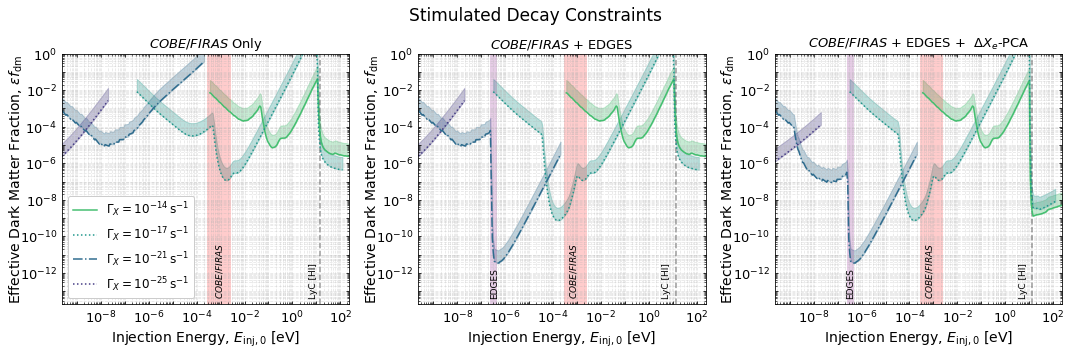

In [87]:
# photon_injection_case = 'bare'
# if photon_injection_case == 'bare':
#     f_dm_fisher = f_dm_fisher_bare
#     case = 'bare'
# if photon_injection_case == 'lyc':
#     f_dm_fisher = f_dm_fisher_lyc
#     case = 'lyc'
# if photon_injection_case == 'lyc_reio':
photon_injection_case = 'extended_run'
#     f_dm_fisher = f_dm_fisher_lyc_reio
#  
case = 'extended run'

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

mklist = iter(['o','s','d','v','>','o','s','d','v','>'])
colors=iter(cm.viridis(np.linspace(0.7,0.,5)))

lstyles = iter(['-',':','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
label_size = 13
title_size = 14
legend_size = 27
handle_length = 1.5

for ax in (ax1,ax2,ax3):
    ax.set_xscale('log')
    ax.set_yscale('log')


    ax.set_ylabel(label_fdm,size=title_size)
    ax.set_xlabel(label_injection_energy,size=title_size)
    ax.yaxis.set_label_coords(-.13,0.5)


    ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(False) #(3)

    ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
    ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
    ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
    ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

    # manipulate x-axis ticks and labels
    ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)

    ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
        
    #ax.text(1e-9, 2e-1, 'Stimulated Decay', fontsize=9, verticalalignment='top',
    #      bbox=dict(boxstyle='round', facecolor='blue', alpha=0.4))



    
    if ax == ax2 or ax == ax3:
        ax.axvspan(1.e-3*xinj_to_Einj, 2e-3*xinj_to_Einj,ymin=0.,ymax=1, facecolor='purple', alpha=0.2)
    #ax.axvspan(0.5*xinj_to_Einj, 105*xinj_to_Einj,ymin=0.,ymax=0.1,  facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
    ax.axvspan(1.2*xinj_to_Einj, 11.2*xinj_to_Einj,ymin=0.,ymax=1, facecolor='red', alpha=0.2)
    ax.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
i = 0
#color=iter(cm.viridis(np.linspace(0.7,0,len(Gamma_values))))
#for gamma in np.flip(Gamma_values):
for gamma in np.flip(Gamma_values):
    #if i<=2 or i%2==0:
    #    i += 1
    #    continue
    col = next(colors)
    mk = next(mklist)
    #ax.plot(f_dm_high_z['curves'][i]['x'],f_dm_high_z['curves'][i]['mu'],c=col,label=r'$\Gamma_X=$'+scientific_notation(f_dm_high_z['Gamma_inj'][i])+r'$\,\mathrm{s^{-1}}$',ls='None', marker=mk,markersize=3)
    style = next(lstyles)
    f_dm_fisher = f_dm_fisher_lyc_reio_no_edges
    y = [x for x in f_dm_fisher['curves'][i]['fdm'] if not np.isnan(x)]
    e = [x for (x,f) in zip(f_dm_fisher['curves'][i]['x'],f_dm_fisher['curves'][i]['fdm']) if not np.isnan(f)]
    y = np.asarray(y)
    e = np.asarray(e)
    ax1.plot(xinj_to_Einj*e,y,c=col,
             label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style, marker='None')
    ax1.plot(xinj_to_Einj*e,-y,c=col,ls=style, marker='None')
    ax1.fill_between(xinj_to_Einj*e, np.abs(y),5*np.abs(y),color=col,alpha=0.3)

    f_dm_fisher = f_dm_fisher_lyc_reio_with_edges
    y = [x for x in f_dm_fisher['curves'][i]['fdm'] if not np.isnan(x)]
    e = [x for (x,f) in zip(f_dm_fisher['curves'][i]['x'],f_dm_fisher['curves'][i]['fdm']) if not np.isnan(f)]
    y = np.asarray(y)
    e = np.asarray(e)
    ax2.plot(xinj_to_Einj*e,y,c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style,
             marker='None')
    ax2.plot(xinj_to_Einj*e,-y,c=col,ls=style, marker='None')
    ax2.fill_between(xinj_to_Einj*e, np.abs(y),5*np.abs(y),color=col,alpha=0.3)

    ax3.plot(xinj_to_Einj*fdm_wpca[i]['xjoint'],fdm_wpca[i]['fdm_joint'],c=col,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style)
    ax3.plot(xinj_to_Einj*fdm_wpca[i]['xjoint'],-fdm_wpca[i]['fdm_joint'],c=col,ls=style, marker='None')
    ax3.fill_between(xinj_to_Einj*fdm_wpca[i]['xjoint'], np.abs(fdm_wpca[i]['fdm_joint']),
                     5*np.abs(fdm_wpca[i]['fdm_joint']),color=col,alpha=0.3)
    i += 1

# ax2.text(0.05, 0.95, case , transform=ax2.transAxes, fontsize=9, verticalalignment='top',
#           bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

ax1.text(0.86, 0.02, 'LyC [HI]' , transform=ax1.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax1.text(0.53, 0.02, r'$COBE/FIRAS$' , transform=ax1.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)


ax2.text(0.52, 0.02, r'$COBE/FIRAS$' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax2.text(0.25, 0.02, r'EDGES' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)

ax2.text(0.85, 0.02, 'LyC [HI]' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)

ax3.text(0.52, 0.02, r'$COBE/FIRAS$' , transform=ax3.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax3.text(0.25, 0.02, r'EDGES' , transform=ax3.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)

ax3.text(0.85, 0.02, 'LyC [HI]' , transform=ax3.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)

ax1.set_ylim(2.e-14,1e0)
ax1.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)

ax2.set_ylim(2.e-14,1e0)
ax2.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)

ax3.set_ylim(2.e-14,1e0)
ax3.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)



ax1.set_title(r'$COBE/FIRAS$ Only',fontsize=13)
ax2.set_title(r'$COBE/FIRAS$ + EDGES',fontsize=13)
ax3.set_title(r'$COBE/FIRAS$ + EDGES +  $\Delta X_e$-PCA',fontsize=13)

#leg1 = plt.legend(loc=3,ncol=2,frameon=True,framealpha=0.6,fontsize = 9)
#legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
#                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
#ax1.legend(loc=3,ncol=1,frameon=True,framealpha=1.,fontsize = 12)
#ax2.legend(loc=4,ncol=1,frameon=True,framealpha=1.,fontsize = 12)
#ax3.legend(loc=4,ncol=1,frameon=True,framealpha=1.,fontsize = 12)


ax1.legend(loc=3,ncol=1,frameon=True,framealpha=1.,fontsize = 12)
#ax2.legend(loc=4,ncol=1,frameon=True,framealpha=1.,fontsize = 12)
#ax3.legend(loc=4,ncol=1,frameon=True,framealpha=1.,fontsize = 12)


plt.suptitle(r'Stimulated Decay Constraints',size=17)

# ax.add_artist(leg2).tight_layout(pad=3.0)
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)
fig.tight_layout(rect=[0, 0.0, 1, 0.93])


plt.savefig(path_to_figures + '/figures_for_paper_fdm_fisher_edges_stim_wpca_'+photon_injection_case+'.pdf')
plt.show()
plt.close(fig)

## Full constraints

In [3]:
sd_lib_extended_run_high_xinj = pi.specdist_ct_spectra_lib()
#pi.load_ct_spectra_lib('extended_run_xe_history_120820',sd_lib_extended_run)
#extended_run_xe_history_Drho_rho_5e-6_no_collision_160820
pi.load_ct_spectra_lib('extended_run_xe_history_Drho_rho_3e-5_zlate_1e3_without_collision_high_xinj_160920b',sd_lib_extended_run_high_xinj)

sd_lib_extended_run = pi.specdist_ct_spectra_lib()
#pi.load_ct_spectra_lib('extended_run_xe_history_120820',sd_lib_extended_run)
#extended_run_xe_history_Drho_rho_5e-6_no_collision_160820
pi.load_ct_spectra_lib('extended_run_xe_history_Drho_rho_3e-5_zlate_1e3_without_collision_stim_070920',sd_lib_extended_run)



In [4]:
def pi_compute_fdm_constraints_stim(log10_tau_a,log10_Einj_in_ev,asd_lib,*args,**kwargs):
    asd_lib_high_xinj0 = kwargs.get('asd_lib_high_xinj0',None)
    Einj_in_ev = 10**log10_Einj_in_ev
    tau_a = 10**log10_tau_a
    #ma_in_ev = log10_ma_in_ev
    #tau_a = log10_tau_a
    xinj = Einj_in_ev/xinj_to_Einj
    #gagg = 3.57e7*(Gamma_values)**0.5*Xinj_values**(-3./2.)
    Gamma = 1./tau_a#((gagg/3.57e7)/xinj**(-3./2.))**2.
    lib_for_constraints = asd_lib
    if asd_lib_high_xinj0:
        #if xinj>1e4 and Gamma<1e-14:
        if xinj>(80./xinj_to_Einj):
            lib_for_constraints = asd_lib_high_xinj0
              
    mode ='' #fisher, QS or mu
    gamma_mu = 1e-8
    if (xinj >= 10. and Gamma < 2e-20): 
        mode = 'QS'
        Gamma_QS = 2e-20
    elif (xinj < 10. and Gamma < 2e-21*xinj):
        mode = 'QS'
        Gamma_QS = 2e-21*xinj
    elif (xinj >= (gamma_mu/1e-15) and Gamma > gamma_mu):
        mode = 'mu'
    elif (xinj < (gamma_mu/1e-15) and Gamma > 1e-15*xinj):
        mode = 'mu'
    else:
        mode = 'fisher'
        #mode = 'fisher'
    
    
    
    
    # for short lifetime, we compute the constraint
    # analytically using the mu-distortion
    if mode  == 'mu':
        ct = sd.cosmotherm()
        ct.ct_T0 = 2.7255
        ct.ct_Yp = 0.245407
        ct.ct_N_eff = 3.046
        ct.ct_Omega_m = 0.312331
        ct.ct_Omega_b = 0.0491137
        ct.ct_h = 0.675422
        
        
        cosmo = sd.cosmo()
        X_dm = sd.dm_particle()
        pi.set_dm_params_to_CT_pi_params(X_dm,ct)
        pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
        
        X_dm.Gamma_inj = Gamma
        X_dm.x_0 = xinj
        #fdm_constraint = np.abs(pi.high_redshift_f_dm_limit(7.4e-5,cosmo,ct,X_dm,N_int = 5))
        fdm_constraint = np.abs(sd.high_redshift_f_dm_limit(7.4e-5,cosmo,ct,X_dm,**kwargs))
        #fdm_constraint = 0.0001
    # for long lifetime, we compute the constraint
    # by extrapolating
    elif mode == 'QS':
        #fdm_constraint = 1e50
        xi_a = [xinj]
        Gamma_values = [Gamma_QS]
        D = sd.pi_run_fisher_constraints(Gamma_values,xi_a,lib_for_constraints,**kwargs)
        fdm_constraint = D['curves'][0]['fdm']*Gamma_QS/Gamma
    # for intermerdiate cases we compute the constraints using fisher matrix
    else:
        #fdm_constraint = 1e100
        xi_a = [xinj]
        Gamma_values = [Gamma]
        D = sd.pi_run_fisher_constraints(Gamma_values,xi_a,lib_for_constraints,**kwargs)
        fdm_constraint = D['curves'][0]['fdm']
        
    return np.log10(fdm_constraint)

pi_compute_fdm_constraints_stim = np.vectorize(pi_compute_fdm_constraints_stim)







In [5]:
def pi_compute_fdm_constraints_stim_w_pca(log10_tau_a,log10_Einj_in_ev,asd_lib,*args,**kwargs):
    asd_lib_high_xinj0 = kwargs.get('asd_lib_high_xinj0',None)
    Einj_in_ev = 10**log10_Einj_in_ev
    tau_a = 10**log10_tau_a
    #ma_in_ev = log10_ma_in_ev
    #tau_a = log10_tau_a
    xinj = Einj_in_ev/xinj_to_Einj
    #gagg = 3.57e7*(Gamma_values)**0.5*Xinj_values**(-3./2.)
    Gamma = 1./tau_a#((gagg/3.57e7)/xinj**(-3./2.))**2.
    lib_for_constraints = asd_lib
    if asd_lib_high_xinj0:
        #if xinj>1e4 and Gamma<1e-14:
        if xinj>(80./xinj_to_Einj):
            lib_for_constraints = asd_lib_high_xinj0
              
    mode ='' #fisher, QS or mu
    gamma_mu = 1e-8
    if (xinj >= 10. and Gamma < 2e-20): 
        mode = 'QS'
        Gamma_QS = 2e-20
    elif (xinj < 10. and Gamma < 2e-21*xinj):
        mode = 'QS'
        Gamma_QS = 2e-21*xinj
    elif (xinj >= (gamma_mu/1e-15) and Gamma > gamma_mu):
        mode = 'mu'
    elif (xinj < (gamma_mu/1e-15) and Gamma > 1e-15*xinj):
        mode = 'mu'
    else:
        mode = 'fisher'
        #mode = 'fisher'
    
    
    
    
    # for short lifetime, we compute the constraint
    # analytically using the mu-distortion
    if mode  == 'mu':
        ct = sd.cosmotherm()
        ct.ct_T0 = 2.7255
        ct.ct_Yp = 0.245407
        ct.ct_N_eff = 3.046
        ct.ct_Omega_m = 0.312331
        ct.ct_Omega_b = 0.0491137
        ct.ct_h = 0.675422
        
        
        cosmo = sd.cosmo()
        X_dm = sd.dm_particle()
        pi.set_dm_params_to_CT_pi_params(X_dm,ct)
        pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
        
        X_dm.Gamma_inj = Gamma
        X_dm.x_0 = xinj
        #fdm_constraint = np.abs(pi.high_redshift_f_dm_limit(7.4e-5,cosmo,ct,X_dm,N_int = 5))
        fdm_constraint = np.abs(sd.high_redshift_f_dm_limit(7.4e-5,cosmo,ct,X_dm,**kwargs))
        #fdm_constraint = 0.0001
    # for long lifetime, we compute the constraint
    # by extrapolating
    elif mode == 'QS':
        #fdm_constraint = 1e50
        xi_a = [xinj]
        Gamma_values = [Gamma_QS]
        D = sd.pi_run_fisher_constraints(Gamma_values,xi_a,lib_for_constraints,**kwargs)
        fdm_constraint = D['curves'][0]['fdm']*Gamma_QS/Gamma

        z_asked = np.logspace(np.log10(1e-2),np.log10(4000),5000)
        S_xe_history = sd.GetXeHistory(Gamma_QS,xinj,z_asked,lib_for_constraints)
        fdm_pca_value_ct = S_xe_history['fdm_pca_lim']*Gamma_QS/Gamma

        ypca = fdm_pca_value_ct
        yfisher = fdm_constraint
        fdm_joint = np.nan
        yjoint = np.nan
        if np.isnan(ypca) and not np.isnan(yfisher):
            yjoint = yfisher
        elif not np.isnan(ypca) and np.isnan(yfisher):
            yjoint = ypca
        elif not np.isnan(ypca) and not np.isnan(yfisher): 
            yjoint = min(ypca,yfisher)
        else:
            yjoint = np.nan
        if not np.isnan(yjoint):
            fdm_joint = yjoint        
        fdm_constraint = fdm_joint
        
        
        
    # for intermerdiate cases we compute the constraints using fisher matrix
    else:
        #fdm_constraint = 1e100
        xi_a = [xinj]
        Gamma_values = [Gamma]
        D = sd.pi_run_fisher_constraints(Gamma_values,xi_a,lib_for_constraints,**kwargs)
        fdm_constraint = D['curves'][0]['fdm']
        
        
        z_asked = np.logspace(np.log10(1e-2),np.log10(4000),5000)
        S_xe_history = sd.GetXeHistory(Gamma,xinj,z_asked,lib_for_constraints)
        fdm_pca_value_ct = S_xe_history['fdm_pca_lim']

        ypca = fdm_pca_value_ct
        yfisher = fdm_constraint
        fdm_joint = np.nan
        yjoint = np.nan
        if np.isnan(ypca) and not np.isnan(yfisher):
            yjoint = yfisher
        elif not np.isnan(ypca) and np.isnan(yfisher):
            yjoint = ypca
        elif not np.isnan(ypca) and not np.isnan(yfisher): 
            yjoint = min(ypca,yfisher)
        else:
            yjoint = np.nan
        if not np.isnan(yjoint):
            fdm_joint = yjoint        
        fdm_constraint = fdm_joint
    
    return np.log10(fdm_constraint)

pi_compute_fdm_constraints_stim_wpca = np.vectorize(pi_compute_fdm_constraints_stim_w_pca)








In [6]:
firas = sd.firas()
edges = sd.edges()

add_edges = 'yes'

#tau_values = np.linspace(5,35,20)
tau_values = np.array([11,14,17])
Einj_values =np.linspace(-10,5,200)
xlist = Einj_values
ylist = tau_values

X, Y = np.meshgrid(xlist, ylist)

a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges
a_dict['stim'] = 'yes'
a_dict['N_int'] = 10

if add_edges == 'yes':
    a_dict['add_edges'] = 'yes'
else:
    a_dict['add_edges'] = 'no'

#lib = sd_lib_lyc_reio

lib = sd_lib_extended_run
a_dict['asd_lib_high_xinj0'] = sd_lib_extended_run_high_xinj

In [7]:
#Z = vfunc_tau_a_contours(Y,X,lib,**a_dict)
Z_with_edges =  pi_compute_fdm_constraints_stim(Y,X,lib,**a_dict)

a_dict['add_edges'] = 'no'
Z_no_edges =  pi_compute_fdm_constraints_stim(Y,X,lib,**a_dict)

In [8]:
a_dict['add_edges'] = 'yes'
Z_with_edges_with_pca =  pi_compute_fdm_constraints_stim_wpca(Y,X,lib,**a_dict)

In [418]:
np.shape(Z_with_edges_with_pca)

(3, 200)

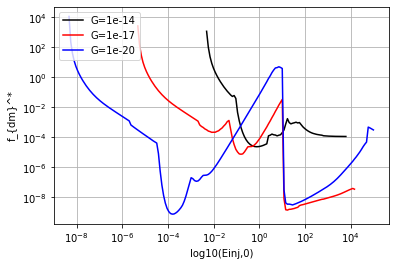

In [419]:
Z = Z_with_edges_with_pca
xarr = 10**Einj_values
plt.plot(xarr,10**Z[0],c='k',label='G=1e-14')
plt.plot(xarr,10**Z[1],c='r',label='G=1e-17')
plt.plot(xarr,10**Z[2],c='b',label='G=1e-20')
#plt.plot(xarr,10**Z[3],c='green',label='G=1e-25')
#plt.plot(xarr,10**Z[4],c='orange',label='G=1e-30')
plt.yscale('log')
plt.xscale('log')
#plt.ylim(1e-12,1e0)
plt.grid()
plt.ylabel('f_{dm}^*')
plt.xlabel('log10(Einj,0)')
plt.legend(loc=2)

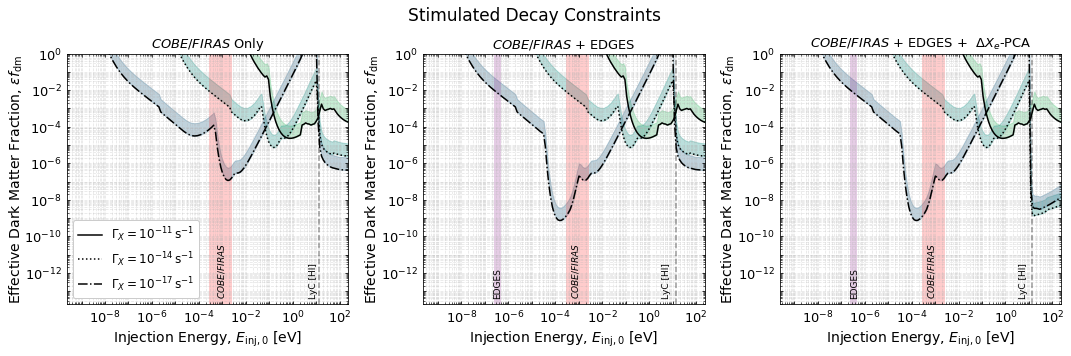

In [13]:


Gamma_values  = 1./(10**tau_values)
gamma_labels = [r'$10^{-11}$',r'$10^{-14}$',r'$10^{-17}$',r'$10^{-20}$',r'$10^{-25}$',r'$10^{-30}$']
#  
xarr = 10**Einj_values

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

mklist = iter(['o','s','d','v','>','o','s','d','v','>'])
colors=iter(cm.viridis(np.linspace(0.7,0.,5)))

lstyles = iter(['-',':','-.',':','-','--','-.',':','-','--','-.',':'])
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
label_size = 13
title_size = 14
legend_size = 27
handle_length = 1.5

for ax in (ax1,ax2,ax3):
    ax.set_xscale('log')
    ax.set_yscale('log')


    ax.set_ylabel(label_fdm,size=title_size)
    ax.set_xlabel(label_injection_energy,size=title_size)
    ax.yaxis.set_label_coords(-.15,0.5)


    ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(False) #(3)

    ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
    ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
    ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
    ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)

    # manipulate x-axis ticks and labels
    ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)

    ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
        
    #ax.text(1e-9, 2e-1, 'Stimulated Decay', fontsize=9, verticalalignment='top',
    #      bbox=dict(boxstyle='round', facecolor='blue', alpha=0.4))



    
    if ax == ax2 or ax == ax3:
        ax.axvspan(1.e-3*xinj_to_Einj, 2e-3*xinj_to_Einj,ymin=0.,ymax=1, facecolor='purple', alpha=0.2)
    #ax.axvspan(0.5*xinj_to_Einj, 105*xinj_to_Einj,ymin=0.,ymax=0.1,  facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
    ax.axvspan(1.2*xinj_to_Einj, 11.2*xinj_to_Einj,ymin=0.,ymax=1, facecolor='red', alpha=0.2)
    ax.axvline(5.7895e4*xinj_to_Einj,ls='--',alpha=0.4,c='k')
i = 0
#color=iter(cm.viridis(np.linspace(0.7,0,len(Gamma_values))))
#for gamma in np.flip(Gamma_values):
for gamma in np.flip(Gamma_values):
    if i >3:
        continue
    col = next(colors)
    mk = next(mklist)
    #ax.plot(f_dm_high_z['curves'][i]['x'],f_dm_high_z['curves'][i]['mu'],c=col,label=r'$\Gamma_X=$'+scientific_notation(f_dm_high_z['Gamma_inj'][i])+r'$\,\mathrm{s^{-1}}$',ls='None', marker=mk,markersize=3)
    style = next(lstyles)
    
    Z = Z_no_edges
    y = 10**Z[i]
    ax1.plot(xarr,y,
             label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style,c='k',marker='None')
    ax1.plot(xarr,-y,ls=style, marker='None',c='k')
    ax1.fill_between(xarr, np.abs(y),5*np.abs(y),color=col,alpha=0.3)


    Z = Z_with_edges
    y = 10**Z[i]
    ax2.plot(xarr,y,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',c='k',ls=style,
             marker='None')
    ax2.plot(xarr,-y,ls=style, marker='None',c='k')
    ax2.fill_between(xarr, np.abs(y),5*np.abs(y),color=col,alpha=0.3)

    Z = Z_with_edges_with_pca
    y = 10**Z[i]
    ax3.plot(xarr,y,label=r'$\Gamma_X=$'+gamma_labels[i]+r'$\,\mathrm{s^{-1}}$',ls=style,c='k')
    ax3.plot(xarr,-y,ls=style, marker='None',c='k')
    ax3.fill_between(xarr, np.abs(y),5*np.abs(y),color=col,alpha=0.3)
    i += 1

# ax2.text(0.05, 0.95, case , transform=ax2.transAxes, fontsize=9, verticalalignment='top',
#           bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

ax1.text(0.86, 0.02, 'LyC [HI]' , transform=ax1.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax1.text(0.53, 0.02, r'$COBE/FIRAS$' , transform=ax1.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)


ax2.text(0.52, 0.02, r'$COBE/FIRAS$' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax2.text(0.25, 0.02, r'EDGES' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)

ax2.text(0.85, 0.02, 'LyC [HI]' , transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)

ax3.text(0.52, 0.02, r'$COBE/FIRAS$' , transform=ax3.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)
ax3.text(0.25, 0.02, r'EDGES' , transform=ax3.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)

ax3.text(0.85, 0.02, 'LyC [HI]' , transform=ax3.transAxes, fontsize=9,
         verticalalignment='bottom',rotation = 90)

ax1.set_ylim(2.e-14,1e0)
ax1.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)

ax2.set_ylim(2.e-14,1e0)
ax2.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)

ax3.set_ylim(2.e-14,1e0)
ax3.set_xlim(xinj_to_Einj*1e-6,xinj_to_Einj*1e6)



ax1.set_title(r'$COBE/FIRAS$ Only',fontsize=13)
ax2.set_title(r'$COBE/FIRAS$ + EDGES',fontsize=13)
ax3.set_title(r'$COBE/FIRAS$ + EDGES +  $\Delta X_e$-PCA',fontsize=13)

#leg1 = plt.legend(loc=3,ncol=2,frameon=True,framealpha=0.6,fontsize = 9)
#legend_elements = [Line2D([0], [0], marker='o', color='k', label='best-fit to CT',ls='None',
#                          markerfacecolor='None', markersize=5)]
#leg2 = plt.legend(handles=legend_elements, loc=(0.745,0.6))
#ax1.legend(loc=3,ncol=1,frameon=True,framealpha=1.,fontsize = 12)
#ax2.legend(loc=4,ncol=1,frameon=True,framealpha=1.,fontsize = 12)
#ax3.legend(loc=4,ncol=1,frameon=True,framealpha=1.,fontsize = 12)


ax1.legend(loc=3,ncol=1,frameon=True,framealpha=1.,fontsize = 12)
#ax2.legend(loc=4,ncol=1,frameon=True,framealpha=1.,fontsize = 12)
#ax3.legend(loc=4,ncol=1,frameon=True,framealpha=1.,fontsize = 12)


plt.suptitle(r'Stimulated Decay Constraints',size=17)

# ax.add_artist(leg2).tight_layout(pad=3.0)
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)
fig.tight_layout(rect=[0, 0.0, 1, 0.93])
photon_injection_case = 'extended_run'

plt.savefig(path_to_figures + '/figures_for_paper_fdm_fisher_edges_stim_wpca_'+photon_injection_case+'_final.pdf')
plt.show()
plt.close(fig)

In [480]:
# load the results
case = 'lyc+reio'
add_edges = 'yes'
name_ext = ''
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_high_xinj_260920'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-6 if math.isnan(x) else x for x in Zf[:,i]]


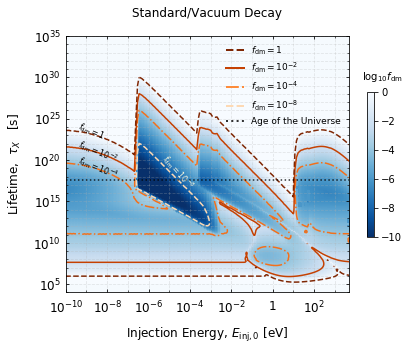

In [481]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 1.5


tau_values = Yf[:,0]
Einj_values = Xf[0]

# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [-8,-4,-2,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf, Yf, Zf,levels,cmap = colormap,norm=normalize,linestyles=['--','-.','-','--'])


# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')



#ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_xlim(Einj_values[0],np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,35)

ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)


# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)


im = ax.imshow(Zf, extent=[-10,5,tau_values[0],
                           tau_values[-1]],
               origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)


ax.text(-9.5, 24.8, r'$f_\mathrm{dm}=1$' , rotation = -23,
          fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 22.8, r'$f_\mathrm{dm}=10^{-2}$' , rotation = -23,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 20.8, r'$f_\mathrm{dm}=10^{-4}$' , rotation = -23,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(-5.5, 21, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -49,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
#        transform=ax.transAxes, fontsize=7, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


#ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='None')

#ax.patch.set_color('white') # or whatever color you like
#ax.patch.set_alpha(.2)

ax.patch.set_color(colormap2(0.99)) # or whatever color you like

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


#ax.text(-1., 33., 'Vacuum Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.4))


#plt.legend()
ax.xaxis.set_label_coords(0.5,-0.13)


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(1.), lw=2,ls='--'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.5), lw=2,ls='-.'),
                Line2D([0], [0], color=cmap(.2), lw=2,ls='--'),
                Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')]
ax.legend(custom_lines, [r'$f_\mathrm{dm}=1$', 
                         r'$f_\mathrm{dm}=10^{-2}$', 
                         r'$f_\mathrm{dm}=10^{-4}$',
                         r'$f_\mathrm{dm}=10^{-8}$',
                        r'Age of the Universe'],loc=1,
        fontsize=9,
         frameon = False,
         facecolor='grey',framealpha=0.2)





plt.title('Standard/Vacuum Decay',pad = 19)
name_ext = ''
case = 'lyc+reio'
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run'
name_ext += '.pdf'
cb = fig.colorbar(im,shrink=0.5)
cb.set_label(r'$\log_{10} f_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_tau_a_finally_' + name_ext)

In [214]:
# load the results
case = 'lyc+reio'
name_ext = ''
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_stim_070920'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-6 if math.isnan(x) else x for x in Zf[:,i]]

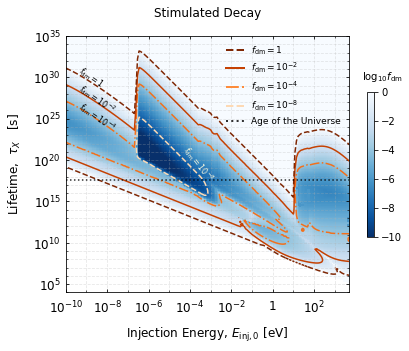

In [254]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 2


tau_values = Yf[:,0]
Einj_values = Xf[0]

# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [-8,-4,-2,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf, Yf, Zf,levels,cmap = colormap,norm=normalize,linestyles=['--','-.','-','--'])


# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


#ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_xlim(Einj_values[0],np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,35)

ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)




# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)


im = ax.imshow(Zf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)


ax.text(-9.5, 31.5, r'$f_\mathrm{dm}=1$' , rotation = -35,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 29.5, r'$f_\mathrm{dm}=10^{-2}$' , rotation = -35,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 27.3, r'$f_\mathrm{dm}=10^{-4}$' , rotation = -35,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(-4.5, 22, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -52,
         fontsize=8, 
          verticalalignment='top',
          color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
#        transform=ax.transAxes, fontsize=7, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


#ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='r')

ax.patch.set_color('white') # or whatever color you like
ax.patch.set_alpha(.2)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])

        
#ax.text(-2, 33, 'Stimulated Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='blue', alpha=0.4))

ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(1.), lw=2,ls='--'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.5), lw=2,ls='-.'),
                Line2D([0], [0], color=cmap(.2), lw=2,ls='--'),
                Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')]
ax.legend(custom_lines, [r'$f_\mathrm{dm}=1$', 
                         r'$f_\mathrm{dm}=10^{-2}$', 
                         r'$f_\mathrm{dm}=10^{-4}$',
                         r'$f_\mathrm{dm}=10^{-8}$',
                        r'Age of the Universe'],loc=1,
        fontsize=9,
         frameon = False,
         facecolor='grey',framealpha=0.2)



ax.xaxis.set_label_coords(0.5,-0.13)
plt.title('Stimulated Decay',pad = 19)
#plt.legend()


name_ext = ''
case = 'lyc+reio'
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run'
name_ext += '.pdf'
cb = fig.colorbar(im,shrink=0.5)
cb.set_label(r'$\log_{10} f_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_tau_a_finally_stim' + name_ext)

In [445]:
sd_lib_extended_run_high_xinj = pi.specdist_ct_spectra_lib()
#pi.load_ct_spectra_lib('extended_run_xe_history_120820',sd_lib_extended_run)
#extended_run_xe_history_Drho_rho_5e-6_no_collision_160820
pi.load_ct_spectra_lib('extended_run_xe_history_Drho_rho_3e-5_zlate_1e3_without_collision_high_xinj_160920b',sd_lib_extended_run_high_xinj)
sd_lib_extended_run = pi.specdist_ct_spectra_lib()
#pi.load_ct_spectra_lib('extended_run_xe_history_120820',sd_lib_extended_run)
#extended_run_xe_history_Drho_rho_5e-6_no_collision_160820
pi.load_ct_spectra_lib('extended_run_xe_history_Drho_rho_3e-5_zlate_1e3_without_collision_190820',sd_lib_extended_run)




In [446]:
def pi_compute_fdm_constraints_w_pca(log10_tau_a,log10_Einj_in_ev,asd_lib,*args,**kwargs):
    
    asd_lib_high_xinj0 = kwargs.get('asd_lib_high_xinj0',None)
    
    Einj_in_ev = 10**log10_Einj_in_ev
    tau_a = 10**log10_tau_a
    #ma_in_ev = log10_ma_in_ev
    #tau_a = log10_tau_a
    xinj = Einj_in_ev/xinj_to_Einj
    #gagg = 3.57e7*(Gamma_values)**0.5*Xinj_values**(-3./2.)
    Gamma = 1./tau_a#((gagg/3.57e7)/xinj**(-3./2.))**2.
    lib_for_constraints = asd_lib
    if asd_lib_high_xinj0:
        #if xinj>1e4 and Gamma<1e-14:
        if xinj>(80./xinj_to_Einj):
            lib_for_constraints = asd_lib_high_xinj0
            
    
    # for short lifetime, we compute the constraint
    # analytically using the mu-distortion
    if Gamma>1e-8:
        ct = sd.cosmotherm()
        ct.ct_T0 = 2.7255
        ct.ct_Yp = 0.245407
        ct.ct_N_eff = 3.046
        ct.ct_Omega_m = 0.312331
        ct.ct_Omega_b = 0.0491137
        ct.ct_h = 0.675422
        
        
        cosmo = sd.cosmo()
        X_dm = sd.dm_particle()
        pi.set_dm_params_to_CT_pi_params(X_dm,ct)
        pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
        
        X_dm.Gamma_inj = Gamma
        X_dm.x_0 = xinj
        fdm_constraint = np.abs(pi.high_redshift_f_dm_limit(7.4e-5,cosmo,ct,X_dm,N_int = 5))
    # for long lifetime, we compute the constraint
    # by extrapolating
    elif Gamma < lib_for_constraints.Gamma_inj_min:
        xi_a = [xinj]
        Gamma_values = [lib_for_constraints.Gamma_inj_min]
        D = sd.pi_run_fisher_constraints(Gamma_values,xi_a,lib_for_constraints,**kwargs)
        fdm_constraint = D['curves'][0]['fdm']*asd_lib.Gamma_inj_min/Gamma
    
        Gamma_QS = lib_for_constraints.Gamma_inj_min
        z_asked = np.logspace(np.log10(1e-2),np.log10(4000),5000)
        S_xe_history = sd.GetXeHistory(Gamma_QS,xinj,z_asked,lib_for_constraints)
        fdm_pca_value_ct = S_xe_history['fdm_pca_lim']*Gamma_QS/Gamma

        ypca = fdm_pca_value_ct
        yfisher = fdm_constraint
        fdm_joint = np.nan
        yjoint = np.nan
        if np.isnan(ypca) and not np.isnan(yfisher):
            yjoint = yfisher
        elif not np.isnan(ypca) and np.isnan(yfisher):
            yjoint = ypca
        elif not np.isnan(ypca) and not np.isnan(yfisher): 
            yjoint = min(ypca,yfisher)
        else:
            yjoint = np.nan
        if not np.isnan(yjoint):
            fdm_joint = yjoint        
        fdm_constraint = fdm_joint

    
    
    # for intermerdiate cases we compute the constraints using fisher matrix
    else:
        xi_a = [xinj]
        Gamma_values = [Gamma]
        D = sd.pi_run_fisher_constraints(Gamma_values,xi_a,lib_for_constraints,**kwargs)
        fdm_constraint = D['curves'][0]['fdm']

        z_asked = np.logspace(np.log10(1e-2),np.log10(4000),5000)
        S_xe_history = sd.GetXeHistory(Gamma,xinj,z_asked,lib_for_constraints)
        fdm_pca_value_ct = S_xe_history['fdm_pca_lim']

        ypca = fdm_pca_value_ct
        yfisher = fdm_constraint
        fdm_joint = np.nan
        yjoint = np.nan
        if np.isnan(ypca) and not np.isnan(yfisher):
            yjoint = yfisher
        elif not np.isnan(ypca) and np.isnan(yfisher):
            yjoint = ypca
        elif not np.isnan(ypca) and not np.isnan(yfisher): 
            yjoint = min(ypca,yfisher)
        else:
            yjoint = np.nan
        if not np.isnan(yjoint):
            fdm_joint = yjoint        
        fdm_constraint = fdm_joint        
    
    
    return np.log10(fdm_constraint)

pi_compute_fdm_constraint_w_pca = np.vectorize(pi_compute_fdm_constraints_w_pca)








In [457]:
firas = sd.firas()
edges = sd.edges()

add_edges = 'yes'

#tau_values = np.linspace(13,20,50)
#Einj_values =np.linspace(0,5,50)

tau_values = np.linspace(5,30,200)
Einj_values =np.linspace(-10,5,200)
#Einj_values =np.linspace(-1,5,50)

xlist = Einj_values
ylist = tau_values

X, Y = np.meshgrid(xlist, ylist)

a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges

if add_edges == 'yes':
    a_dict['add_edges'] = 'yes'
else:
    a_dict['add_edges'] = 'no'

#lib = sd_lib_lyc_reio
lib = sd_lib_extended_run
a_dict['asd_lib_high_xinj0'] = sd_lib_extended_run_high_xinj

#Z = vfunc_tau_a_contours(Y,X,lib,**a_dict)
Z =  pi_compute_fdm_constraint_w_pca(Y,X,lib,**a_dict)

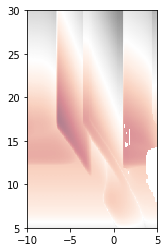

In [458]:
plt.imshow(Z, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
           cmap='RdGy', alpha=0.5)

In [459]:
# save the results

case = 'lyc+reio'
name_ext = ''
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_high_xinj_260920_wpca'
#name_ext += '_test'
np.shape(Z)
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'

    
np.savetxt(path, Z, delimiter='\t', fmt='%.4e')

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'


np.savetxt(path, X, delimiter='\t', fmt='%.4e')

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'


np.savetxt(path, Y, delimiter='\t', fmt='%.4e')



In [461]:
case = 'lyc+reio'
name_ext = ''
add_edges = 'yes'
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_high_xinj_260920_wpca'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-10 if math.isnan(x) else x for x in Zf[:,i]]



In [463]:
Zf

array([[3.6074, 3.6074, 3.6074, ..., 3.6339, 3.6295, 3.6259],
       [2.5385, 2.5385, 2.5385, ..., 2.5627, 2.5587, 2.5554],
       [2.0235, 2.0235, 2.0235, ..., 2.0455, 2.0419, 2.0389],
       ...,
       [6.1228, 6.1634, 6.155 , ..., 9.182 , 9.1152, 9.0451],
       [6.2485, 6.2891, 6.2806, ..., 9.3076, 9.2408, 9.1707],
       [6.3741, 6.4147, 6.4063, ..., 9.4333, 9.3665, 9.2964]])

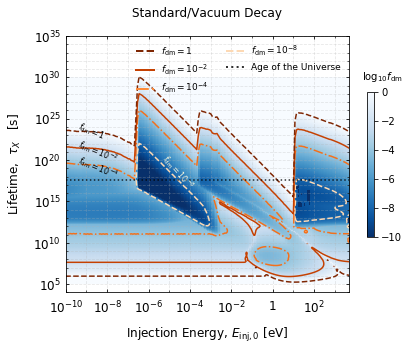

In [464]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 1.5


tau_values = Yf[:,0]
Einj_values = Xf[0]

# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [-8,-4,-2,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf, Yf, Zf,levels,cmap = colormap,norm=normalize,linestyles=['--','-.','-','--'])


# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')



#ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_xlim(Einj_values[0],np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,35)

ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)


# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)


im = ax.imshow(Zf, extent=[-10,5,tau_values[0],
                           tau_values[-1]],
               origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)


ax.text(-9.5, 24.8, r'$f_\mathrm{dm}=1$' , rotation = -23,
          fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 22.8, r'$f_\mathrm{dm}=10^{-2}$' , rotation = -23,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 20.8, r'$f_\mathrm{dm}=10^{-4}$' , rotation = -23,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(-5.5, 21, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -49,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
#        transform=ax.transAxes, fontsize=7, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


#ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='None')

ax.patch.set_color('white') # or whatever color you like
ax.patch.set_alpha(.2)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


#ax.text(-1., 33., 'Vacuum Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.4))


#plt.legend()
ax.xaxis.set_label_coords(0.5,-0.13)


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(1.), lw=2,ls='--'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.5), lw=2,ls='-.'),
                Line2D([0], [0], color=cmap(.2), lw=2,ls='--'),
                Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')]
ax.legend(custom_lines, [r'$f_\mathrm{dm}=1$', 
                         r'$f_\mathrm{dm}=10^{-2}$', 
                         r'$f_\mathrm{dm}=10^{-4}$',
                         r'$f_\mathrm{dm}=10^{-8}$',
                        r'Age of the Universe'],loc=1,
        fontsize=9,
         frameon = False,
          ncol = 2,
         facecolor='grey',framealpha=0.2)





plt.title('Standard/Vacuum Decay',pad = 19)
name_ext = ''
case = 'lyc+reio'
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run_wpca'
name_ext += '.pdf'
cb = fig.colorbar(im,shrink=0.5)
cb.set_label(r'$\log_{10} f_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_tau_a_finally_' + name_ext)

In [449]:
firas = sd.firas()
edges = sd.edges()

add_edges = 'no'

#tau_values = np.linspace(13,20,50)
#Einj_values =np.linspace(0,5,50)

tau_values = np.linspace(5,30,200)
Einj_values =np.linspace(-10,5,200)
#Einj_values =np.linspace(-1,5,50)

xlist = Einj_values
ylist = tau_values

X, Y = np.meshgrid(xlist, ylist)

a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges

if add_edges == 'yes':
    a_dict['add_edges'] = 'yes'
else:
    a_dict['add_edges'] = 'no'

#lib = sd_lib_lyc_reio
lib = sd_lib_extended_run
a_dict['asd_lib_high_xinj0'] = sd_lib_extended_run_high_xinj

#Z = vfunc_tau_a_contours(Y,X,lib,**a_dict)
Z =  pi_compute_fdm_constraint_w_pca(Y,X,lib,**a_dict)

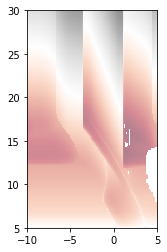

In [450]:
plt.imshow(Z, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
           cmap='RdGy', alpha=0.5)

In [451]:
# save the results

case = 'lyc+reio'
name_ext = ''
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_high_xinj_260920_no_edges_wpca'
#name_ext += '_test'
np.shape(Z)
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'

    
np.savetxt(path, Z, delimiter='\t', fmt='%.4e')

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'


np.savetxt(path, X, delimiter='\t', fmt='%.4e')

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'


np.savetxt(path, Y, delimiter='\t', fmt='%.4e')



In [455]:
case = 'lyc+reio'
name_ext = ''
add_edges = 'no'
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_high_xinj_260920_no_edges_wpca'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-10 if math.isnan(x) else x for x in Zf[:,i]]



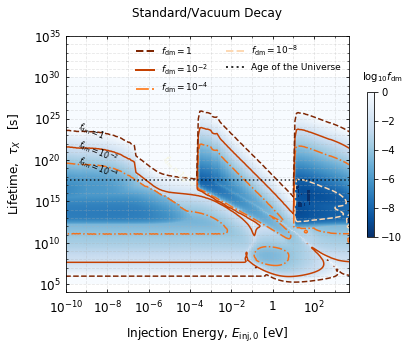

In [456]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 1.5


tau_values = Yf[:,0]
Einj_values = Xf[0]

# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [-8,-4,-2,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf, Yf, Zf,levels,cmap = colormap,norm=normalize,linestyles=['--','-.','-','--'])


# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')



#ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_xlim(Einj_values[0],np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,35)

ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)


# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)


im = ax.imshow(Zf, extent=[-10,5,tau_values[0],
                           tau_values[-1]],
               origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)


ax.text(-9.5, 24.8, r'$f_\mathrm{dm}=1$' , rotation = -23,
          fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 22.8, r'$f_\mathrm{dm}=10^{-2}$' , rotation = -23,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 20.8, r'$f_\mathrm{dm}=10^{-4}$' , rotation = -23,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(-5.5, 21, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -49,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
#        transform=ax.transAxes, fontsize=7, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


#ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='None')

ax.patch.set_color('white') # or whatever color you like
ax.patch.set_alpha(.2)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


#ax.text(-1., 33., 'Vacuum Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.4))


#plt.legend()
ax.xaxis.set_label_coords(0.5,-0.13)


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(1.), lw=2,ls='--'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.5), lw=2,ls='-.'),
                Line2D([0], [0], color=cmap(.2), lw=2,ls='--'),
                Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')]
ax.legend(custom_lines, [r'$f_\mathrm{dm}=1$', 
                         r'$f_\mathrm{dm}=10^{-2}$', 
                         r'$f_\mathrm{dm}=10^{-4}$',
                         r'$f_\mathrm{dm}=10^{-8}$',
                        r'Age of the Universe'],loc=1,
        fontsize=9,
         frameon = False,
          ncol = 2,
         facecolor='grey',framealpha=0.2)





plt.title('Standard/Vacuum Decay',pad = 19)
name_ext = ''
case = 'lyc+reio'
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run_wpca'
name_ext += '.pdf'
cb = fig.colorbar(im,shrink=0.5)
cb.set_label(r'$\log_{10} f_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_tau_a_finally_' + name_ext)

In [277]:
def pi_compute_fdm_constraints(log10_tau_a,log10_Einj_in_ev,asd_lib,*args,**kwargs):
    
    asd_lib_high_xinj0 = kwargs.get('asd_lib_high_xinj0',None)
    
    Einj_in_ev = 10**log10_Einj_in_ev
    tau_a = 10**log10_tau_a
    #ma_in_ev = log10_ma_in_ev
    #tau_a = log10_tau_a
    xinj = Einj_in_ev/xinj_to_Einj
    #gagg = 3.57e7*(Gamma_values)**0.5*Xinj_values**(-3./2.)
    Gamma = 1./tau_a#((gagg/3.57e7)/xinj**(-3./2.))**2.
    lib_for_constraints = asd_lib
    if asd_lib_high_xinj0:
        #if xinj>1e4 and Gamma<1e-14:
        if xinj>(80./xinj_to_Einj):
            lib_for_constraints = asd_lib_high_xinj0
            
    
    # for short lifetime, we compute the constraint
    # analytically using the mu-distortion
    if Gamma>1e-8:
        ct = sd.cosmotherm()
        ct.ct_T0 = 2.7255
        ct.ct_Yp = 0.245407
        ct.ct_N_eff = 3.046
        ct.ct_Omega_m = 0.312331
        ct.ct_Omega_b = 0.0491137
        ct.ct_h = 0.675422
        
        
        cosmo = sd.cosmo()
        X_dm = sd.dm_particle()
        pi.set_dm_params_to_CT_pi_params(X_dm,ct)
        pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
        
        X_dm.Gamma_inj = Gamma
        X_dm.x_0 = xinj
        fdm_constraint = np.abs(pi.high_redshift_f_dm_limit(7.4e-5,cosmo,ct,X_dm,N_int = 5))
    # for long lifetime, we compute the constraint
    # by extrapolating
    elif Gamma < lib_for_constraints.Gamma_inj_min:
        xi_a = [xinj]
        Gamma_values = [lib_for_constraints.Gamma_inj_min]
        D = sd.pi_run_fisher_constraints(Gamma_values,xi_a,lib_for_constraints,**kwargs)
        fdm_constraint = D['curves'][0]['fdm']*asd_lib.Gamma_inj_min/Gamma
    # for intermerdiate cases we compute the constraints using fisher matrix
    else:
        xi_a = [xinj]
        Gamma_values = [Gamma]
        D = sd.pi_run_fisher_constraints(Gamma_values,xi_a,lib_for_constraints,**kwargs)
        fdm_constraint = D['curves'][0]['fdm']
    return np.log10(fdm_constraint)

pi_compute_fdm_constraints = np.vectorize(pi_compute_fdm_constraints)








In [278]:
firas = sd.firas()
edges = sd.edges()

add_edges = 'no'

#tau_values = np.linspace(13,20,50)
#Einj_values =np.linspace(0,5,50)

tau_values = np.linspace(5,30,200)
Einj_values =np.linspace(-10,5,200)
#Einj_values =np.linspace(-1,5,50)

xlist = Einj_values
ylist = tau_values

X, Y = np.meshgrid(xlist, ylist)

a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges

if add_edges == 'yes':
    a_dict['add_edges'] = 'yes'
else:
    a_dict['add_edges'] = 'no'

#lib = sd_lib_lyc_reio
lib = sd_lib_extended_run
a_dict['asd_lib_high_xinj0'] = sd_lib_extended_run_high_xinj

#Z = vfunc_tau_a_contours(Y,X,lib,**a_dict)
Z =  pi_compute_fdm_constraints(Y,X,lib,**a_dict)

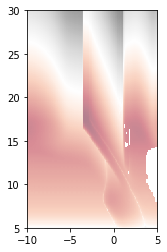

In [279]:
plt.imshow(Z, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
           cmap='RdGy', alpha=0.5)

In [280]:
# save the results

case = 'lyc+reio'
name_ext = ''
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_high_xinj_260920_no_edges'
#name_ext += '_test'
np.shape(Z)
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'

    
np.savetxt(path, Z, delimiter='\t', fmt='%.4e')

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'


np.savetxt(path, X, delimiter='\t', fmt='%.4e')

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'


np.savetxt(path, Y, delimiter='\t', fmt='%.4e')



In [284]:
case = 'lyc+reio'
name_ext = ''
add_edges = 'no'
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_high_xinj_260920_no_edges'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-6 if math.isnan(x) else x for x in Zf[:,i]]



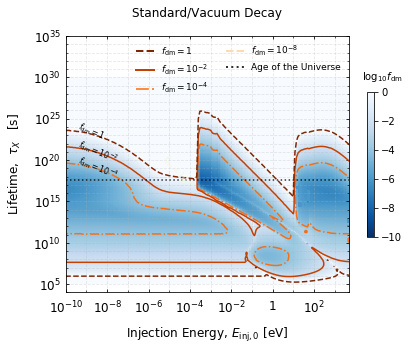

In [286]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 1.5


tau_values = Yf[:,0]
Einj_values = Xf[0]

# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [-8,-4,-2,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf, Yf, Zf,levels,cmap = colormap,norm=normalize,linestyles=['--','-.','-','--'])


# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')



#ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_xlim(Einj_values[0],np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,35)

ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)


# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)


im = ax.imshow(Zf, extent=[-10,5,tau_values[0],
                           tau_values[-1]],
               origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)


ax.text(-9.5, 24.8, r'$f_\mathrm{dm}=1$' , rotation = -23,
          fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 22.8, r'$f_\mathrm{dm}=10^{-2}$' , rotation = -23,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 20.8, r'$f_\mathrm{dm}=10^{-4}$' , rotation = -23,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(-5.5, 21, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -49,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
#        transform=ax.transAxes, fontsize=7, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


#ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='None')

ax.patch.set_color('white') # or whatever color you like
ax.patch.set_alpha(.2)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


#ax.text(-1., 33., 'Vacuum Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.4))


#plt.legend()
ax.xaxis.set_label_coords(0.5,-0.13)


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(1.), lw=2,ls='--'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.5), lw=2,ls='-.'),
                Line2D([0], [0], color=cmap(.2), lw=2,ls='--'),
                Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')]
ax.legend(custom_lines, [r'$f_\mathrm{dm}=1$', 
                         r'$f_\mathrm{dm}=10^{-2}$', 
                         r'$f_\mathrm{dm}=10^{-4}$',
                         r'$f_\mathrm{dm}=10^{-8}$',
                        r'Age of the Universe'],loc=1,
        fontsize=9,
         frameon = False,
          ncol = 2,
         facecolor='grey',framealpha=0.2)





plt.title('Standard/Vacuum Decay',pad = 19)
name_ext = ''
case = 'lyc+reio'
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run'
name_ext += '.pdf'
cb = fig.colorbar(im,shrink=0.5)
cb.set_label(r'$\log_{10} f_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_tau_a_finally_' + name_ext)

In [287]:
def g_agg(gamma,xinj):
    gagg = 3.57e7*gamma**0.5*xinj**(-3./2.)
    return gagg

g_agg = np.vectorize(g_agg)

def gammaX(gagg,xinj):
    gamma = (gagg/(3.57e7*xinj**(-3./2.)))**2.
    return gamma
gammaX = np.vectorize(gammaX)

In [471]:
# load the results
case = 'lyc+reio'
name_ext = ''
add_edges = 'no'
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_high_xinj_260920_no_edges'

#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-5 if math.isnan(x) else x for x in Zf[:,i]]

tau_values = Yf[:,0]
Einj_values = Xf[0]


xinj_values = 10**Einj_values/xinj_to_Einj

mX_values = np.log10(xinj_to_mass*xinj_values)
gamma_values = np.log10(1./10**tau_values)
gagg_values = np.log10(g_agg(10**gamma_values,xinj_values))

# create an interpolating function fdm(m_X, Gamma_X):
import scipy 
f_at_einj_and_tauinj_no_edges = scipy.interpolate.interp2d(Einj_values, tau_values, Zf,
                                                kind='linear',bounds_error=False,fill_value=np.nan)

In [472]:
# load the results
case = 'lyc+reio'
add_edges = 'yes'
name_ext = ''
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_high_xinj_260920'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-5 if math.isnan(x) else x for x in Zf[:,i]]

tau_values = Yf[:,0]
Einj_values = Xf[0]


xinj_values = 10**Einj_values/xinj_to_Einj

mX_values = np.log10(xinj_to_mass*xinj_values)
gamma_values = np.log10(1./10**tau_values)
gagg_values = np.log10(g_agg(10**gamma_values,xinj_values))

# create an interpolating function fdm(m_X, Gamma_X):
import scipy 
f_at_einj_and_tauinj = scipy.interpolate.interp2d(Einj_values, tau_values, Zf,
                                                kind='linear',bounds_error=False,fill_value=np.nan)

In [473]:
# load the results
case = 'lyc+reio'
add_edges = 'yes'
name_ext = ''
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_high_xinj_260920_wpca'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-5 if math.isnan(x) else x for x in Zf[:,i]]

tau_values = Yf[:,0]
Einj_values = Xf[0]


xinj_values = 10**Einj_values/xinj_to_Einj

mX_values = np.log10(xinj_to_mass*xinj_values)
gamma_values = np.log10(1./10**tau_values)
gagg_values = np.log10(g_agg(10**gamma_values,xinj_values))

# create an interpolating function fdm(m_X, Gamma_X):
import scipy 
f_at_einj_and_tauinj_wedges_wpca = scipy.interpolate.interp2d(Einj_values, tau_values, Zf,
                                                kind='linear',bounds_error=False,fill_value=np.nan)

In [474]:
Xf_gagg = np.zeros((200, 200))
Yf_gagg = np.zeros((200, 200))
Zf_gagg = np.zeros((200, 200))
Zf_gagg_no_edges = np.zeros((200, 200))
Zf_gagg_with_edges_with_pca = np.zeros((200, 200))

In [475]:
for i in range(200):
    for j in range(200):
        einj = 10**Xf[i][j]
        tau_X = 10**Yf[i][j]
        #fdm  = Zf[i][j]

        xinj = einj/xinj_to_Einj
        Xf_gagg[i][j]=np.log10(xinj_to_mass*xinj)
        gamma = 1./tau_X
        Yf_gagg[i][j]=np.log10(g_agg(gamma,xinj))
        #Zf_gagg[i][j] = fdm
    
    
    
    

In [476]:
# find minimum value of log10 gagg
mymin = min([min(r) for r in Yf_gagg])
print(mymin)
# find maximum value of log10 gagg
mymax = max([max(r) for r in Yf_gagg])
print(mymax)
# All the g_agg values in the range
# have been computed before:
print(gagg_values[0],gagg_values[199], len(gagg_values))
# Xf_gagg contains the masses:
# Xf_gagg = [[m_min,...,m_max],
#              :::::::::::::: ,
#            [m_min,...,m_max],]
# Yf_gagg_new has to contain the g_agg values as follows (in column):
Yf_gagg_new  = np.zeros((200,200))
for i in range(200):
    Yf_gagg_new[:,i] = gagg_values[::-1]

# then we loop over gagg and mX values and compute fdm:
for i in range(200):
    for j in range(200):
        log10mX = Xf_gagg[i][j]
        log10gagg = Yf_gagg_new[i][j]
        # compute lifetime  corresponding to mX and gagg:
        xinj = 10**log10mX/xinj_to_mass
        einj = xinj_to_Einj*xinj
        gamma  = gammaX(10**log10gagg,xinj)
        tauinj = 1./gamma
        fdm = f_at_einj_and_tauinj(np.log10(einj),np.log10(tauinj))
        Zf_gagg[i][j] = fdm
        fdm = f_at_einj_and_tauinj_no_edges(np.log10(einj),np.log10(tauinj))
        Zf_gagg_no_edges[i][j] = fdm
        fdm = f_at_einj_and_tauinj_wedges_wpca(np.log10(einj),np.log10(tauinj))
        Zf_gagg_with_edges_with_pca[i][j] = fdm





-20.391007258721398
14.608992741278602
14.608992741278602 -20.391007258721398 200


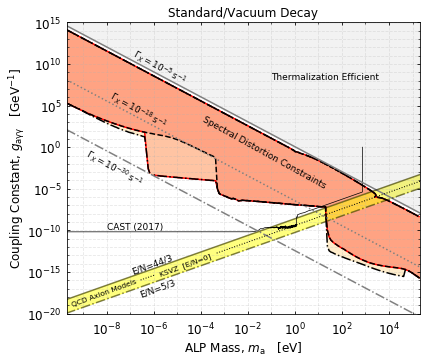

In [479]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 1.5




# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

#levels = [-8,-4,-2,0]
levels = [-100,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf_gagg, Yf_gagg_new, Zf_gagg,
                levels,norm=normalize,linestyles=['-','-'],colors=['r','r'])
CS = ax.contourf(Xf_gagg, Yf_gagg_new, Zf_gagg,
                levels,extend='min',colors=['w','r'],alpha=0.2)


CS = ax.contour(Xf_gagg, Yf_gagg_new, Zf_gagg_no_edges,
                levels,norm=normalize,linestyles=['--','--'],colors=['k','k'])
CS = ax.contourf(Xf_gagg, Yf_gagg_new, Zf_gagg_no_edges,
                levels,extend='min',colors=['w','r'],alpha=0.2)

CS = ax.contour(Xf_gagg, Yf_gagg_new, Zf_gagg_with_edges_with_pca,
                levels,norm=normalize,linestyles=['-.','-.'],colors=['k','k'])
CS = ax.contourf(Xf_gagg, Yf_gagg_new, Zf_gagg_with_edges_with_pca,
                levels,extend='min',colors=['w','orange'],alpha=0.2)




# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')





ax.set_xlabel("ALP Mass, "+r'$m_\mathrm{a}\quad[\mathrm{eV}]$',size=title_size)
ax.set_ylabel("Coupling Constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
#ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.11,0.5)
ax.xaxis.set_label_coords(0.5,-.09)


# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)




ax.set_xlim(mX_values[0],mX_values[-1])
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(gagg_values[::-1][0],gagg_values[::-1][-1])

#im = ax.imshow(Zf_gagg, 
#               extent=[mX_values[0],mX_values[-1],gagg_values[::-1][0],
#                           gagg_values[::-1][-1]],
#               origin='lower',
#           cmap=colormap2,norm=normalize, 
#               alpha=1.,aspect=0.5
#              )


#ax.text(-9.5, 24.8, r'$f_\mathrm{dm}=1$' , rotation = -23,
#          fontsize=8, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(-9.5, 22.8, r'$f_\mathrm{dm}=10^{-2}$' , rotation = -23,
#         fontsize=8, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(-9.5, 20.8, r'$f_\mathrm{dm}=10^{-4}$' , rotation = -23,
#         fontsize=8, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



#ax.text(-5.5, 21, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -49,
#        fontsize=8, 
#          verticalalignment='top',color='k',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
#        transform=ax.transAxes, fontsize=7, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


#ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='None')

ax.patch.set_color('white') # or whatever color you like
ax.patch.set_alpha(.2)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{0}$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{-20}$',r'$10^{-15}$',r'$10^{-10}$',r'$10^{-5}$',r'$10^{0}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$'])
CAST = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/cast_env_2016.dat')
m_cast = CAST[:,0]
gagg_cast = CAST[:,1]
ax.plot(np.log10(m_cast),np.log10(gagg_cast),c='k',ls='-',lw=0.7)
#ax.fill_between(np.log10(m_cast),np.log10(gagg_cast),np.log10(5.*gagg_cast),color='k',ls='-',lw=0.7)



xinj_values = 10**mX_values/xinj_to_mass
gamma = 1e-5
np.log10(g_agg(gamma,xinj_values))
ax.plot(mX_values,np.log10(g_agg(gamma,xinj_values)),c='grey',label='G=1e-8')
gamma = 1e-30
np.log10(g_agg(gamma,xinj_values))
ax.plot(mX_values,np.log10(g_agg(gamma,xinj_values)),c='grey',ls='-.',label='G=1e-30')
gamma = 1e-18
np.log10(g_agg(gamma,xinj_values))
ax.plot(mX_values,np.log10(g_agg(gamma,xinj_values)),c='grey',ls=':',label='G=1e-17')
#ax.text(0.5, 33., 'Standard Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.4))



mass_in_eV = np.logspace(-11,9,100)
xinj_am = mass_in_eV/xinj_to_mass

E_over_N_minus_bla = 5./3. - 1.949
#E_over_N_minus_bla = 0.07#2. - 1.949
def f_p(m):
    return (3.4718e24/(E_over_N_minus_bla)**2.)*m**-5

tau = []
for m in mass_in_eV:
    tau.append(f_p(m))
tau_low = np.asarray(tau)
#ax.plot(mass_in_eV ,tau*1e-12,ls = '-')
gamma_low = 1./tau_low

E_over_N_minus_bla = 44./3. - 1.949
def f_p(m):
    return (3.4718e24/(E_over_N_minus_bla)**2.)*m**-5

tau = []
for m in mass_in_eV:
    tau.append(f_p(m))
tau_high = np.asarray(tau)
gamma_high = 1./tau_high

ax.plot(np.log10(mass_in_eV),np.log10(g_agg(gamma_high,xinj_am)),ls='-',c='k',alpha=0.5)
ax.plot(np.log10(mass_in_eV),np.log10(g_agg(gamma_low,xinj_am)),ls='-.',c='k',alpha=0.5)
ax.fill_between(np.log10(mass_in_eV),np.log10(g_agg(gamma_high,xinj_am)),np.log10(g_agg(gamma_low,xinj_am)),
                color='yellow',alpha=0.5)
# ticks=np.arange(-10,6)
# plt.xticks(ticks)
# ticks=np.arange(5,30)
# plt.yticks(ticks)

# fig.tight_layout()


tau_ksvz = 8.9078e23*mass_in_eV**-5
gamma_ksvz = 1./tau_ksvz

ax.plot(np.log10(mass_in_eV)[(np.log10(mass_in_eV)>-6.6) & (np.log10(mass_in_eV)<-5.9)],
        np.log10(g_agg(gamma_ksvz,xinj_am))[(np.log10(mass_in_eV)>-6.6) & (np.log10(mass_in_eV)<-5.9)],
        c='k',lw=1,ls=':')

ax.plot(np.log10(mass_in_eV)[np.log10(mass_in_eV)>-3.5],
        np.log10(g_agg(gamma_ksvz,xinj_am))[np.log10(mass_in_eV)>-3.5],
        c='k',lw=1,ls=':')

ax.text(-5.8,-12.6, r'KSVZ  [E/N=0]' , rotation = 20.2,
        fontsize=7.5, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))





ax.text(-6.65, -15.6, r'E/N=5/3' , rotation = 20.2,
         fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))

ax.text(-7, -12.7, r'E/N=44/3' , rotation = 20.2,
         fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))




ax.text(-8, -9, r'CAST (2017)' , rotation = 0,
         fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))




ax.text(-9, 0, r'$\Gamma_X = 10^{-30}\,\mathrm{s}^{-1}$' , rotation = -29,
         fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))



ax.text(-8, 7, r'$\Gamma_X = 10^{-18}\,\mathrm{s}^{-1}$' , rotation = -29,
         fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))

ax.text(-7, 12, r'$\Gamma_X = 10^{-5}\,\mathrm{s}^{-1}$' , rotation = -29,
         fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))


ax.text(-4, 4, 'Spectral Distortion Constraints' , rotation = -29,c='k',
         fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))





ax.text(-9.5,-15.7, r'QCD Axion Models' , rotation = 20.2,
        fontsize=7.5, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))


ax.text(-1, 9, r'Thermalization Efficient' , rotation = 0,c='k',
         fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))

xinj_values = 10**mX_values/xinj_to_mass
gamma = 1e-5
np.log10(g_agg(gamma,xinj_values))
#ax.plot(mX_values,np.log10(g_agg(gamma,xinj_values)),c='grey',label='G=1e-8')
ax.fill_between(mX_values,np.log10(g_agg(gamma,xinj_values)),15,color='grey',alpha=0.1)


#ax.text(2., 13., 'Vacuum Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.4))

ax.set_ylim(-20,15)

fig.tight_layout()
#plt.legend()


name_ext = ''
case = 'lyc+reio'
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run'
name_ext += '.pdf'

plt.title('Standard/Vacuum Decay')
plt.savefig(path_to_figures + '/figures_for_paper_gagg_finally' + name_ext)

In [436]:
# load the results
case = 'lyc+reio'
add_edges = 'yes'
name_ext = ''
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_stim_070920'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-5 if math.isnan(x) else x for x in Zf[:,i]]

tau_values = Yf[:,0]
Einj_values = Xf[0]


xinj_values = 10**Einj_values/xinj_to_Einj

mX_values = np.log10(xinj_to_mass*xinj_values)
gamma_values = np.log10(1./10**tau_values)
gagg_values = np.log10(g_agg(10**gamma_values,xinj_values))

# create an interpolating function fdm(m_X, Gamma_X):
import scipy 
f_at_einj_and_tauinj = scipy.interpolate.interp2d(Einj_values, tau_values, Zf,
                                                kind='linear',bounds_error=False,fill_value=np.nan)

In [437]:
# load the results
case = 'lyc+reio'
add_edges = 'no'
name_ext = ''
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_stim_070920_no_edges'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-5 if math.isnan(x) else x for x in Zf[:,i]]

tau_values = Yf[:,0]
Einj_values = Xf[0]


xinj_values = 10**Einj_values/xinj_to_Einj

mX_values = np.log10(xinj_to_mass*xinj_values)
gamma_values = np.log10(1./10**tau_values)
gagg_values = np.log10(g_agg(10**gamma_values,xinj_values))

# create an interpolating function fdm(m_X, Gamma_X):
import scipy 
f_at_einj_and_tauinj_no_edges = scipy.interpolate.interp2d(Einj_values, tau_values, Zf,
                                                kind='linear',bounds_error=False,fill_value=np.nan)

In [438]:
# save the results
add_edges = 'yes'
case = 'lyc+reio'
name_ext = ''
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_stim_070920_no_edges_wpca'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-5 if math.isnan(x) else x for x in Zf[:,i]]

tau_values = Yf[:,0]
Einj_values = Xf[0]


xinj_values = 10**Einj_values/xinj_to_Einj

mX_values = np.log10(xinj_to_mass*xinj_values)
gamma_values = np.log10(1./10**tau_values)
gagg_values = np.log10(g_agg(10**gamma_values,xinj_values))

# create an interpolating function fdm(m_X, Gamma_X):
import scipy 
f_at_einj_and_tauinj_with_edges_wpca = scipy.interpolate.interp2d(Einj_values, tau_values, Zf,
                                                kind='linear',bounds_error=False,fill_value=np.nan)

In [439]:
Xf_gagg = np.zeros((200, 200))
Yf_gagg = np.zeros((200, 200))
Zf_gagg = np.zeros((200, 200))
Zf_gagg_no_edges = np.zeros((200, 200))
Zf_gagg_with_edges_wpca = np.zeros((200, 200))

In [440]:
for i in range(200):
    for j in range(200):
        einj = 10**Xf[i][j]
        tau_X = 10**Yf[i][j]
        #fdm  = Zf[i][j]

        xinj = einj/xinj_to_Einj
        Xf_gagg[i][j]=np.log10(xinj_to_mass*xinj)
        gamma = 1./tau_X
        Yf_gagg[i][j]=np.log10(g_agg(gamma,xinj))
        #Zf_gagg[i][j] = fdm
    
    
    

In [441]:
# find minimum value of log10 gagg
mymin = min([min(r) for r in Yf_gagg])
print(mymin)
# find maximum value of log10 gagg
mymax = max([max(r) for r in Yf_gagg])
print(mymax)
# All the g_agg values in the range
# have been computed before:
print(gagg_values[0],gagg_values[199], len(gagg_values))
# Xf_gagg contains the masses:
# Xf_gagg = [[m_min,...,m_max],
#              :::::::::::::: ,
#            [m_min,...,m_max],]
# Yf_gagg_new has to contain the g_agg values as follows (in column):
Yf_gagg_new  = np.zeros((200,200))
for i in range(200):
    Yf_gagg_new[:,i] = gagg_values[::-1]

# then we loop over gagg and mX values and compute fdm:
for i in range(200):
    for j in range(200):
        log10mX = Xf_gagg[i][j]
        log10gagg = Yf_gagg_new[i][j]
        # compute lifetime  corresponding to mX and gagg:
        xinj = 10**log10mX/xinj_to_mass
        einj = xinj_to_Einj*xinj
        gamma  = gammaX(10**log10gagg,xinj)
        tauinj = 1./gamma
        fdm = f_at_einj_and_tauinj(np.log10(einj),np.log10(tauinj))
        Zf_gagg[i][j] = fdm
        fdm = f_at_einj_and_tauinj_no_edges(np.log10(einj),np.log10(tauinj))
        Zf_gagg_no_edges[i][j] = fdm
        fdm = f_at_einj_and_tauinj_with_edges_wpca(np.log10(einj),np.log10(tauinj))
        Zf_gagg_with_edges_wpca[i][j] = fdm





-22.891007258721398
14.608992741278602
14.608992741278602 -22.891007258721398 200


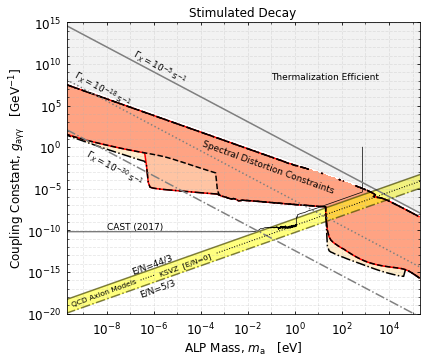

In [443]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 1.5




# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

#levels = [-8,-4,-2,0]
levels = [-100,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf_gagg, Yf_gagg_new, Zf_gagg,
                levels,norm=normalize,linestyles=['-','-'],colors=['r','r'])
CS = ax.contourf(Xf_gagg, Yf_gagg_new, Zf_gagg,
                levels,extend='min',colors=['w','r'],alpha=0.2)


CS = ax.contour(Xf_gagg, Yf_gagg_new, Zf_gagg_no_edges,
                levels,norm=normalize,linestyles=['--','--'],colors=['k','k'])
CS = ax.contourf(Xf_gagg, Yf_gagg_new, Zf_gagg_no_edges,
                levels,extend='min',colors=['w','r'],alpha=0.2)

CS = ax.contour(Xf_gagg, Yf_gagg_new, Zf_gagg_with_edges_wpca,
                levels,norm=normalize,linestyles=['-.','-.'],colors=['k','k'])
CS = ax.contourf(Xf_gagg, Yf_gagg_new, Zf_gagg_with_edges_wpca,
                levels,extend='min',colors=['w','orange'],alpha=0.2)

# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')





ax.set_xlabel("ALP Mass, "+r'$m_\mathrm{a}\quad[\mathrm{eV}]$',size=title_size)
ax.set_ylabel("Coupling Constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
#ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.11,0.5)
ax.xaxis.set_label_coords(0.5,-.09)


# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)




ax.set_xlim(mX_values[0],mX_values[-1])
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(gagg_values[::-1][0],gagg_values[::-1][-1])

#im = ax.imshow(Zf_gagg, 
#               extent=[mX_values[0],mX_values[-1],gagg_values[::-1][0],
#                           gagg_values[::-1][-1]],
#               origin='lower',
#           cmap=colormap2,norm=normalize, 
#               alpha=1.,aspect=0.5
#              )


#ax.text(-9.5, 24.8, r'$f_\mathrm{dm}=1$' , rotation = -23,
#          fontsize=8, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(-9.5, 22.8, r'$f_\mathrm{dm}=10^{-2}$' , rotation = -23,
#         fontsize=8, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(-9.5, 20.8, r'$f_\mathrm{dm}=10^{-4}$' , rotation = -23,
#         fontsize=8, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



#ax.text(-5.5, 21, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -49,
#        fontsize=8, 
#          verticalalignment='top',color='k',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
#        transform=ax.transAxes, fontsize=7, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


#ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='None')

ax.patch.set_color('white') # or whatever color you like
ax.patch.set_alpha(.2)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{0}$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{-20}$',r'$10^{-15}$',r'$10^{-10}$',r'$10^{-5}$',r'$10^{0}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$'])
CAST = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/cast_env_2016.dat')
m_cast = CAST[:,0]
gagg_cast = CAST[:,1]
ax.plot(np.log10(m_cast),np.log10(gagg_cast),c='k',ls='-',lw=0.7)
#ax.fill_between(np.log10(m_cast),np.log10(gagg_cast),np.log10(5.*gagg_cast),color='k',ls='-',lw=0.7)



xinj_values = 10**mX_values/xinj_to_mass
gamma = 1e-5
np.log10(g_agg(gamma,xinj_values))
ax.plot(mX_values,np.log10(g_agg(gamma,xinj_values)),c='grey',label='G=1e-8')
gamma = 1e-30
np.log10(g_agg(gamma,xinj_values))
ax.plot(mX_values,np.log10(g_agg(gamma,xinj_values)),c='grey',ls='-.',label='G=1e-30')
gamma = 1e-18
np.log10(g_agg(gamma,xinj_values))
ax.plot(mX_values,np.log10(g_agg(gamma,xinj_values)),c='grey',ls=':',label='G=1e-17')
#ax.text(0.5, 33., 'Standard Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.4))



mass_in_eV = np.logspace(-11,9,100)
xinj_am = mass_in_eV/xinj_to_mass

E_over_N_minus_bla = 5./3. - 1.949
#E_over_N_minus_bla = 0.07#2. - 1.949
def f_p(m):
    return (3.4718e24/(E_over_N_minus_bla)**2.)*m**-5

tau = []
for m in mass_in_eV:
    tau.append(f_p(m))
tau_low = np.asarray(tau)
#ax.plot(mass_in_eV ,tau*1e-12,ls = '-')
gamma_low = 1./tau_low

E_over_N_minus_bla = 44./3. - 1.949
def f_p(m):
    return (3.4718e24/(E_over_N_minus_bla)**2.)*m**-5

tau = []
for m in mass_in_eV:
    tau.append(f_p(m))
tau_high = np.asarray(tau)
gamma_high = 1./tau_high

ax.plot(np.log10(mass_in_eV),np.log10(g_agg(gamma_high,xinj_am)),ls='-',c='k',alpha=0.5)
ax.plot(np.log10(mass_in_eV),np.log10(g_agg(gamma_low,xinj_am)),ls='-.',c='k',alpha=0.5)
ax.fill_between(np.log10(mass_in_eV),np.log10(g_agg(gamma_high,xinj_am)),np.log10(g_agg(gamma_low,xinj_am)),
                color='yellow',alpha=0.5)
# ticks=np.arange(-10,6)
# plt.xticks(ticks)
# ticks=np.arange(5,30)
# plt.yticks(ticks)

# fig.tight_layout()


tau_ksvz = 8.9078e23*mass_in_eV**-5
gamma_ksvz = 1./tau_ksvz

ax.plot(np.log10(mass_in_eV)[(np.log10(mass_in_eV)>-6.6) & (np.log10(mass_in_eV)<-5.9)],
        np.log10(g_agg(gamma_ksvz,xinj_am))[(np.log10(mass_in_eV)>-6.6) & (np.log10(mass_in_eV)<-5.9)],
        c='k',lw=1,ls=':')

ax.plot(np.log10(mass_in_eV)[np.log10(mass_in_eV)>-3.5],
        np.log10(g_agg(gamma_ksvz,xinj_am))[np.log10(mass_in_eV)>-3.5],
        c='k',lw=1,ls=':')

ax.text(-5.8,-12.6, r'KSVZ  [E/N=0]' , rotation = 20.2,
        fontsize=7.5, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))





ax.text(-6.65, -15.6, r'E/N=5/3' , rotation = 20.2,
         fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))

ax.text(-7, -12.7, r'E/N=44/3' , rotation = 20.2,
         fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))




ax.text(-8, -9, r'CAST (2017)' , rotation = 0,
         fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))




ax.text(-9, 0, r'$\Gamma_X = 10^{-30}\,\mathrm{s}^{-1}$' , rotation = -29,
         fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))



ax.text(-9.5, 9.5, r'$\Gamma_X = 10^{-18}\,\mathrm{s}^{-1}$' , rotation = -29,
         fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))

ax.text(-7, 12, r'$\Gamma_X = 10^{-5}\,\mathrm{s}^{-1}$' , rotation = -29,
         fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))



ax.text(-4, 1, 'Spectral Distortion Constraints' , rotation = -20,c='k',
         fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))






ax.text(-9.5,-15.7, r'QCD Axion Models' , rotation = 20.2,
        fontsize=7.5, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))



ax.text(-1, 9, r'Thermalization Efficient' , rotation = 0,c='k',
         fontsize=9, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='yellow',edgecolor='none', alpha=0.))

xinj_values = 10**mX_values/xinj_to_mass
gamma = 1e-5
np.log10(g_agg(gamma,xinj_values))
#ax.plot(mX_values,np.log10(g_agg(gamma,xinj_values)),c='grey',label='G=1e-8')
ax.fill_between(mX_values,np.log10(g_agg(gamma,xinj_values)),15,color='grey',alpha=0.1)

mX_valuess = mX_values[mX_values<3.2]
xinj_values = 10**mX_valuess/xinj_to_mass

gamma = 1e-5
np.log10(g_agg(gamma,xinj_values))
#ax.plot(mX_values,np.log10(g_agg(gamma,xinj_values)),c='grey',label='G=1e-8')
ax.fill_between(mX_valuess,np.log10(g_agg(gamma,xinj_values))+0.5*mX_valuess-1.8,np.log10(g_agg(gamma,xinj_values)),color='grey',alpha=0.1)




#ax.text(2., 13., 'Vacuum Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.4))

ax.set_ylim(-20,15)

fig.tight_layout()
#plt.legend()


name_ext = ''
case = 'lyc+reio'
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run'
name_ext += '_stimulated.pdf'

plt.title('Stimulated Decay')
plt.savefig(path_to_figures + '/figures_for_paper_gagg_finally' + name_ext)

In [305]:
sd_lib_extended_run_high_xinj = pi.specdist_ct_spectra_lib()
#pi.load_ct_spectra_lib('extended_run_xe_history_120820',sd_lib_extended_run)
#extended_run_xe_history_Drho_rho_5e-6_no_collision_160820
pi.load_ct_spectra_lib('extended_run_xe_history_Drho_rho_3e-5_zlate_1e3_without_collision_high_xinj_160920b',sd_lib_extended_run_high_xinj)
#pi.load_ct_spectra_lib('extended_run_xe_history_Drho_rho_3e-5_zlate_1e3_without_collision_stim_070920',sd_lib_extended_run_stim)
#pi.load_ct_spectra_lib('extended_run_xe_history_Drho_rho_1e-8_160820',sd_lib_extended_run)
# sd_lib_xe_history_finj_fisher = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('xe_hi@story_200720_finj_fisher',sd_lib_xe_history_finj_fisher)
#sd_lib_lyc_reio = pi.specdist_ct_spectra_lib()
#pi.load_ct_spectra_lib('lyc_reio',sd_lib_lyc_reio)

In [306]:
sd_lib_extended_run = pi.specdist_ct_spectra_lib()
#pi.load_ct_spectra_lib('extended_run_xe_history_120820',sd_lib_extended_run)
#extended_run_xe_history_Drho_rho_5e-6_no_collision_160820
pi.load_ct_spectra_lib('extended_run_xe_history_Drho_rho_3e-5_zlate_1e3_without_collision_stim_070920',sd_lib_extended_run)
#pi.load_ct_spectra_lib('extended_run_xe_history_Drho_rho_1e-8_160820',sd_lib_extended_run)
# sd_lib_xe_history_finj_fisher = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('xe_hi@story_200720_finj_fisher',sd_lib_xe_history_finj_fisher)
#sd_lib_lyc_reio = pi.specdist_ct_spectra_lib()

In [430]:
firas = sd.firas()
edges = sd.edges()

add_edges = 'yes'

tau_values = np.linspace(5,35,200)
#tau_values = np.linspace(5,15,30)
Einj_values =np.linspace(-10,5,200)
xlist = Einj_values
ylist = tau_values

X, Y = np.meshgrid(xlist, ylist)

a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges
a_dict['stim'] = 'yes'
a_dict['N_int'] = 10

if add_edges == 'yes':
    a_dict['add_edges'] = 'yes'
else:
    a_dict['add_edges'] = 'no'

#lib = sd_lib_lyc_reio

lib = sd_lib_extended_run
a_dict['asd_lib_high_xinj0'] = sd_lib_extended_run_high_xinj


#Z = vfunc_tau_a_contours(Y,X,lib,**a_dict)
Z =  pi_compute_fdm_constraints_stim_wpca(Y,X,lib,**a_dict)

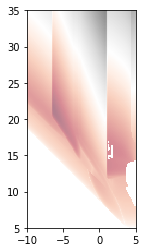

In [432]:
plt.imshow(Z, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
           cmap='RdGy', alpha=0.5)

In [433]:
# save the results

case = 'lyc+reio'
name_ext = ''
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_stim_070920_no_edges_wpca'
#name_ext += '_test'
np.shape(Z)
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'

    
np.savetxt(path, Z, delimiter='\t', fmt='%.4e')

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'


np.savetxt(path, X, delimiter='\t', fmt='%.4e')

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'


np.savetxt(path, Y, delimiter='\t', fmt='%.4e')





In [434]:
# save the results
add_edges = 'yes'
case = 'lyc+reio'
name_ext = ''
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_stim_070920_no_edges_wpca'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-10 if math.isnan(x) else x for x in Zf[:,i]]

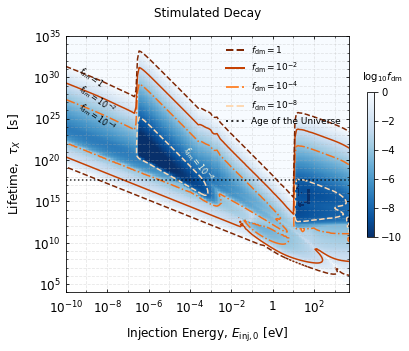

In [435]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 2


tau_values = Yf[:,0]
Einj_values = Xf[0]

# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [-8,-4,-2,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf, Yf, Zf,levels,cmap = colormap,norm=normalize,linestyles=['--','-.','-','--'])


# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


#ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_xlim(Einj_values[0],np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,35)

ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)




# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)


im = ax.imshow(Zf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)


ax.text(-9.5, 31.5, r'$f_\mathrm{dm}=1$' , rotation = -35,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 29.5, r'$f_\mathrm{dm}=10^{-2}$' , rotation = -35,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 27.3, r'$f_\mathrm{dm}=10^{-4}$' , rotation = -35,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(-4.5, 22, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -52,
         fontsize=8, 
          verticalalignment='top',
          color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
#        transform=ax.transAxes, fontsize=7, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


#ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='r')

ax.patch.set_color('white') # or whatever color you like
ax.patch.set_alpha(.2)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])

        
#ax.text(-2, 33, 'Stimulated Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='blue', alpha=0.4))

ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(1.), lw=2,ls='--'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.5), lw=2,ls='-.'),
                Line2D([0], [0], color=cmap(.2), lw=2,ls='--'),
                Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')]
ax.legend(custom_lines, [r'$f_\mathrm{dm}=1$', 
                         r'$f_\mathrm{dm}=10^{-2}$', 
                         r'$f_\mathrm{dm}=10^{-4}$',
                         r'$f_\mathrm{dm}=10^{-8}$',
                        r'Age of the Universe'],loc=1,
        fontsize=9,
         frameon = False,
         facecolor='grey',framealpha=0.2)



ax.xaxis.set_label_coords(0.5,-0.13)
plt.title('Stimulated Decay',pad = 19)
#plt.legend()


name_ext = ''
case = 'lyc+reio'
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run'
name_ext += '_with_edge_wpcas.pdf'
cb = fig.colorbar(im,shrink=0.5)
cb.set_label(r'$\log_{10} f_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_tau_a_finally_stim' + name_ext)

In [421]:
firas = sd.firas()
edges = sd.edges()

add_edges = 'no'

tau_values = np.linspace(5,35,200)
#tau_values = np.linspace(5,15,30)
Einj_values =np.linspace(-10,5,200)
xlist = Einj_values
ylist = tau_values

X, Y = np.meshgrid(xlist, ylist)

a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges
a_dict['stim'] = 'yes'
a_dict['N_int'] = 10

if add_edges == 'yes':
    a_dict['add_edges'] = 'yes'
else:
    a_dict['add_edges'] = 'no'

#lib = sd_lib_lyc_reio

lib = sd_lib_extended_run
a_dict['asd_lib_high_xinj0'] = sd_lib_extended_run_high_xinj


#Z = vfunc_tau_a_contours(Y,X,lib,**a_dict)
Z =  pi_compute_fdm_constraints_stim_wpca(Y,X,lib,**a_dict)

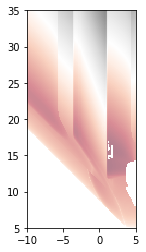

In [422]:
plt.imshow(Z, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
           cmap='RdGy', alpha=0.5)

In [423]:
# save the results

case = 'lyc+reio'
name_ext = ''
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_stim_070920_no_edges_wpca'
#name_ext += '_test'
np.shape(Z)
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'

    
np.savetxt(path, Z, delimiter='\t', fmt='%.4e')

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'


np.savetxt(path, X, delimiter='\t', fmt='%.4e')

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'


np.savetxt(path, Y, delimiter='\t', fmt='%.4e')






In [426]:
# save the results

case = 'lyc+reio'
name_ext = ''
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_stim_070920_no_edges_wpca'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-10 if math.isnan(x) else x for x in Zf[:,i]]

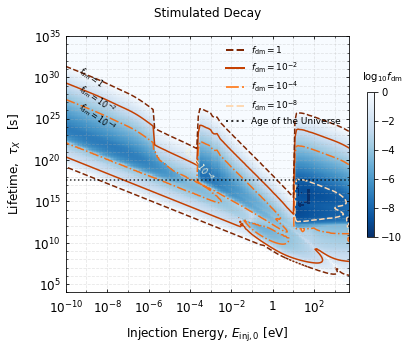

In [427]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 2


tau_values = Yf[:,0]
Einj_values = Xf[0]

# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [-8,-4,-2,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf, Yf, Zf,levels,cmap = colormap,norm=normalize,linestyles=['--','-.','-','--'])


# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


#ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_xlim(Einj_values[0],np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,35)

ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)




# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)


im = ax.imshow(Zf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)


ax.text(-9.5, 31.5, r'$f_\mathrm{dm}=1$' , rotation = -35,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 29.5, r'$f_\mathrm{dm}=10^{-2}$' , rotation = -35,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 27.3, r'$f_\mathrm{dm}=10^{-4}$' , rotation = -35,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(-4.5, 22, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -52,
         fontsize=8, 
          verticalalignment='top',
          color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
#        transform=ax.transAxes, fontsize=7, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


#ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='r')

ax.patch.set_color('white') # or whatever color you like
ax.patch.set_alpha(.2)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])

        
#ax.text(-2, 33, 'Stimulated Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='blue', alpha=0.4))

ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(1.), lw=2,ls='--'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.5), lw=2,ls='-.'),
                Line2D([0], [0], color=cmap(.2), lw=2,ls='--'),
                Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')]
ax.legend(custom_lines, [r'$f_\mathrm{dm}=1$', 
                         r'$f_\mathrm{dm}=10^{-2}$', 
                         r'$f_\mathrm{dm}=10^{-4}$',
                         r'$f_\mathrm{dm}=10^{-8}$',
                        r'Age of the Universe'],loc=1,
        fontsize=9,
         frameon = False,
         facecolor='grey',framealpha=0.2)



ax.xaxis.set_label_coords(0.5,-0.13)
plt.title('Stimulated Decay',pad = 19)
#plt.legend()


name_ext = ''
case = 'lyc+reio'
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run'
name_ext += '_no_edge_wpcas.pdf'
cb = fig.colorbar(im,shrink=0.5)
cb.set_label(r'$\log_{10} f_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_tau_a_finally_stim' + name_ext)

In [307]:
def pi_compute_fdm_constraints_stim(log10_tau_a,log10_Einj_in_ev,asd_lib,*args,**kwargs):
    asd_lib_high_xinj0 = kwargs.get('asd_lib_high_xinj0',None)
    Einj_in_ev = 10**log10_Einj_in_ev
    tau_a = 10**log10_tau_a
    #ma_in_ev = log10_ma_in_ev
    #tau_a = log10_tau_a
    xinj = Einj_in_ev/xinj_to_Einj
    #gagg = 3.57e7*(Gamma_values)**0.5*Xinj_values**(-3./2.)
    Gamma = 1./tau_a#((gagg/3.57e7)/xinj**(-3./2.))**2.
    lib_for_constraints = asd_lib
    if asd_lib_high_xinj0:
        #if xinj>1e4 and Gamma<1e-14:
        if xinj>(80./xinj_to_Einj):
            lib_for_constraints = asd_lib_high_xinj0
              
    mode ='' #fisher, QS or mu
    gamma_mu = 1e-8
    if (xinj >= 10. and Gamma < 2e-20): 
        mode = 'QS'
        Gamma_QS = 2e-20
    elif (xinj < 10. and Gamma < 2e-21*xinj):
        mode = 'QS'
        Gamma_QS = 2e-21*xinj
    elif (xinj >= (gamma_mu/1e-15) and Gamma > gamma_mu):
        mode = 'mu'
    elif (xinj < (gamma_mu/1e-15) and Gamma > 1e-15*xinj):
        mode = 'mu'
    else:
        mode = 'fisher'
        #mode = 'fisher'
    
    
    
    
    # for short lifetime, we compute the constraint
    # analytically using the mu-distortion
    if mode  == 'mu':
        ct = sd.cosmotherm()
        ct.ct_T0 = 2.7255
        ct.ct_Yp = 0.245407
        ct.ct_N_eff = 3.046
        ct.ct_Omega_m = 0.312331
        ct.ct_Omega_b = 0.0491137
        ct.ct_h = 0.675422
        
        
        cosmo = sd.cosmo()
        X_dm = sd.dm_particle()
        pi.set_dm_params_to_CT_pi_params(X_dm,ct)
        pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
        
        X_dm.Gamma_inj = Gamma
        X_dm.x_0 = xinj
        #fdm_constraint = np.abs(pi.high_redshift_f_dm_limit(7.4e-5,cosmo,ct,X_dm,N_int = 5))
        fdm_constraint = np.abs(sd.high_redshift_f_dm_limit(7.4e-5,cosmo,ct,X_dm,**kwargs))
        #fdm_constraint = 0.0001
    # for long lifetime, we compute the constraint
    # by extrapolating
    elif mode == 'QS':
        #fdm_constraint = 1e50
        xi_a = [xinj]
        Gamma_values = [Gamma_QS]
        D = sd.pi_run_fisher_constraints(Gamma_values,xi_a,lib_for_constraints,**kwargs)
        fdm_constraint = D['curves'][0]['fdm']*Gamma_QS/Gamma
    # for intermerdiate cases we compute the constraints using fisher matrix
    else:
        #fdm_constraint = 1e100
        xi_a = [xinj]
        Gamma_values = [Gamma]
        D = sd.pi_run_fisher_constraints(Gamma_values,xi_a,lib_for_constraints,**kwargs)
        fdm_constraint = D['curves'][0]['fdm']
        
    return np.log10(fdm_constraint)

pi_compute_fdm_constraints_stim = np.vectorize(pi_compute_fdm_constraints_stim)







In [309]:
firas = sd.firas()
edges = sd.edges()

add_edges = 'no'

tau_values = np.linspace(5,35,200)
#tau_values = np.linspace(5,15,30)
Einj_values =np.linspace(-10,5,200)
xlist = Einj_values
ylist = tau_values

X, Y = np.meshgrid(xlist, ylist)

a_dict = {}
a_dict['firas'] = firas
a_dict['edges'] = edges
a_dict['stim'] = 'yes'
a_dict['N_int'] = 10

if add_edges == 'yes':
    a_dict['add_edges'] = 'yes'
else:
    a_dict['add_edges'] = 'no'

#lib = sd_lib_lyc_reio

lib = sd_lib_extended_run
a_dict['asd_lib_high_xinj0'] = sd_lib_extended_run_high_xinj


#Z = vfunc_tau_a_contours(Y,X,lib,**a_dict)
Z =  pi_compute_fdm_constraints_stim(Y,X,lib,**a_dict)

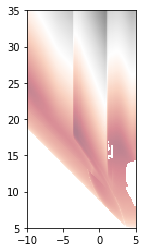

In [311]:
plt.imshow(Z, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
           cmap='RdGy', alpha=0.5)

In [312]:
# save the results

case = 'lyc+reio'
name_ext = ''
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_stim_070920_no_edges'
#name_ext += '_test'
np.shape(Z)
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'

    
np.savetxt(path, Z, delimiter='\t', fmt='%.4e')

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'


np.savetxt(path, X, delimiter='\t', fmt='%.4e')

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'


np.savetxt(path, Y, delimiter='\t', fmt='%.4e')






In [428]:
# save the results

case = 'lyc+reio'
name_ext = ''
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_stim_070920_no_edges'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-6 if math.isnan(x) else x for x in Zf[:,i]]

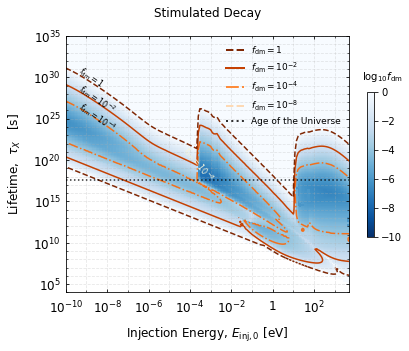

In [429]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 2


tau_values = Yf[:,0]
Einj_values = Xf[0]

# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [-8,-4,-2,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf, Yf, Zf,levels,cmap = colormap,norm=normalize,linestyles=['--','-.','-','--'])


# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


#ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_xlim(Einj_values[0],np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,35)

ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)




# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)


im = ax.imshow(Zf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)


ax.text(-9.5, 31.5, r'$f_\mathrm{dm}=1$' , rotation = -35,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 29.5, r'$f_\mathrm{dm}=10^{-2}$' , rotation = -35,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 27.3, r'$f_\mathrm{dm}=10^{-4}$' , rotation = -35,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(-4.5, 22, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -52,
         fontsize=8, 
          verticalalignment='top',
          color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
#        transform=ax.transAxes, fontsize=7, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


#ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='r')

ax.patch.set_color('white') # or whatever color you like
ax.patch.set_alpha(.2)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])

        
#ax.text(-2, 33, 'Stimulated Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='blue', alpha=0.4))

ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(1.), lw=2,ls='--'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.5), lw=2,ls='-.'),
                Line2D([0], [0], color=cmap(.2), lw=2,ls='--'),
                Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')]
ax.legend(custom_lines, [r'$f_\mathrm{dm}=1$', 
                         r'$f_\mathrm{dm}=10^{-2}$', 
                         r'$f_\mathrm{dm}=10^{-4}$',
                         r'$f_\mathrm{dm}=10^{-8}$',
                        r'Age of the Universe'],loc=1,
        fontsize=9,
         frameon = False,
         facecolor='grey',framealpha=0.2)



ax.xaxis.set_label_coords(0.5,-0.13)
plt.title('Stimulated Decay',pad = 19)
#plt.legend()


name_ext = ''
case = 'lyc+reio'
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run'
name_ext += '_no_edges.pdf'
cb = fig.colorbar(im,shrink=0.5)
cb.set_label(r'$\log_{10} f_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_tau_a_finally_stim' + name_ext)

In [375]:
# load the results
case = 'lyc+reio'
name_ext = ''
add_edges = 'no'
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_high_xinj_260920_no_edges'

#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-5 if math.isnan(x) else x for x in Zf[:,i]]

#for i in range(200):
#    for j in range(200):
#        ej = 10**Xf[0][j]
#        mdm = (10**Zf[i][j]/ej)**-1
#        if mdm>ej:
#            Zf[i][j] = Zf[i][j]
#        else:
#            Zf[i][j] = -100#

tau_values = Yf[:,0]
Einj_values = Xf[0]

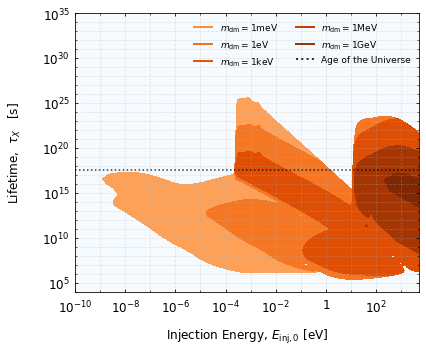

In [402]:
import matplotlib as mpl

fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 2


tau_values = Yf[:,0]
Einj_values = Xf[0]
Mf = np.log10((10**Zf/10**Einj_values)**-1)
#Einj_values =np.linspace(-10,5,500)
#tau_values = np.linspace(5,30,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

#levels = [3,6,9]

levels = [-3,0,3,6,9,100]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=10)


#bounds = levels
#colormap2 = mpl.cm.viridis
#norm = mpl.colors.BoundaryNorm(bounds, colormap2)

CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])


levels = [0,100]
CS2 = ax.contourf(Xf, Yf, Zf,levels,cmap = colormap2,norm=normalize,linestyles=['-'],alpha=1)



# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


name_ext = ''

if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '.pdf'

ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_ylim(tau_values[0],tau_values[-1])


#ax.yaxis.set_label_coords(-.08,0.5)
ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)

#im = ax.imshow(Mf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#           #cmap=colormap2,
#               norm=normalize, alpha=1.)


#im = ax.imshow(Mf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
#           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)

ax.set_xlim(Einj_values[0],np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,35)


ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])

        
#ax.text(-2, 33, 'Stimulated Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='blue', alpha=0.4))

ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(.5), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.6), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.7), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.9), lw=2,ls='-'),
                Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')]
ax.legend(custom_lines, [r'$m_\mathrm{dm}=1 \mathrm{meV}$', 
                          r'$m_\mathrm{dm}=1 \mathrm{eV}$', 
                         r'$m_\mathrm{dm}=1 \mathrm{keV}$', 
                         r'$m_\mathrm{dm}=1 \mathrm{MeV}$',
                         r'$m_\mathrm{dm}=1 \mathrm{GeV}$',
                        r'Age of the Universe'],loc=1,
        fontsize=9,ncol=2,
         frameon = False,
         facecolor='grey',framealpha=0.2)

ax.patch.set_color(colormap2(0.99)) # or whatever color you like
#ax.patch.set_alpha(.2)

ax.xaxis.set_label_coords(0.5,-0.13)


#cb = fig.colorbar(im,shrink=0.5)
#cb.set_label(r'$\log_{10} m_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
#plt.legend()
plt.savefig(path_to_figures + '/figures_for_paper_mdm_condition.pdf')

In [403]:
case = 'lyc+reio'
name_ext = ''
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_stim_070920_no_edges'

#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-5 if math.isnan(x) else x for x in Zf[:,i]]

#for i in range(200):
#    for j in range(200):
#        ej = 10**Xf[0][j]
#        mdm = (10**Zf[i][j]/ej)**-1
#        if mdm>ej:
#            Zf[i][j] = Zf[i][j]
#        else:
#            Zf[i][j] = -100#

tau_values = Yf[:,0]
Einj_values = Xf[0]

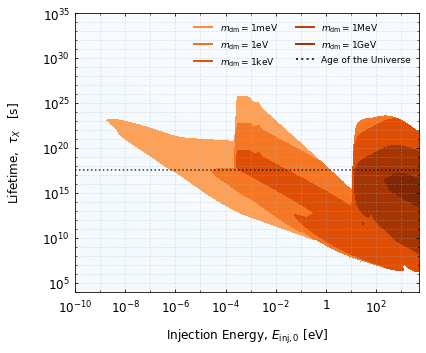

In [404]:
import matplotlib as mpl

fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 2


tau_values = Yf[:,0]
Einj_values = Xf[0]
Mf = np.log10((10**Zf/10**Einj_values)**-1)
#Einj_values =np.linspace(-10,5,500)
#tau_values = np.linspace(5,30,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

#levels = [3,6,9]

levels = [-3,0,3,6,9,100]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=10)


#bounds = levels
#colormap2 = mpl.cm.viridis
#norm = mpl.colors.BoundaryNorm(bounds, colormap2)

CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])


levels = [0,100]
CS2 = ax.contourf(Xf, Yf, Zf,levels,cmap = colormap2,norm=normalize,linestyles=['-'],alpha=1)



# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


name_ext = ''

if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '.pdf'

ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_ylim(tau_values[0],tau_values[-1])


#ax.yaxis.set_label_coords(-.08,0.5)
ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)

#im = ax.imshow(Mf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#           #cmap=colormap2,
#               norm=normalize, alpha=1.)


#im = ax.imshow(Mf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
#           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)

ax.set_xlim(Einj_values[0],np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,35)


ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])

        
#ax.text(-2, 33, 'Stimulated Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='blue', alpha=0.4))

ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(.5), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.6), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.7), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.9), lw=2,ls='-'),
                Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')]
ax.legend(custom_lines, [r'$m_\mathrm{dm}=1 \mathrm{meV}$', 
                          r'$m_\mathrm{dm}=1 \mathrm{eV}$', 
                         r'$m_\mathrm{dm}=1 \mathrm{keV}$', 
                         r'$m_\mathrm{dm}=1 \mathrm{MeV}$',
                         r'$m_\mathrm{dm}=1 \mathrm{GeV}$',
                        r'Age of the Universe'],loc=1,
        fontsize=9,ncol=2,
         frameon = False,
         facecolor='grey',framealpha=0.2)

ax.patch.set_color(colormap2(0.99)) # or whatever color you like
#ax.patch.set_alpha(.2)

ax.xaxis.set_label_coords(0.5,-0.13)


#cb = fig.colorbar(im,shrink=0.5)
#cb.set_label(r'$\log_{10} m_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
#plt.legend()
plt.savefig(path_to_figures + '/figures_for_paper_mdm_condition_stim.pdf')

In [406]:
# load the results
case = 'lyc+reio'
add_edges = 'yes'
name_ext = ''
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_high_xinj_260920'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)
import math
for i in range(200):
    Zf[:,i] = [-5 if math.isnan(x) else x for x in Zf[:,i]]

#for i in range(200):
#    for j in range(200):
#        ej = 10**Xf[0][j]
#        mdm = (10**Zf[i][j]/ej)**-1
#        if mdm>ej:
#            Zf[i][j] = Zf[i][j]
#        else:
#            Zf[i][j] = -100#

tau_values = Yf[:,0]
Einj_values = Xf[0]

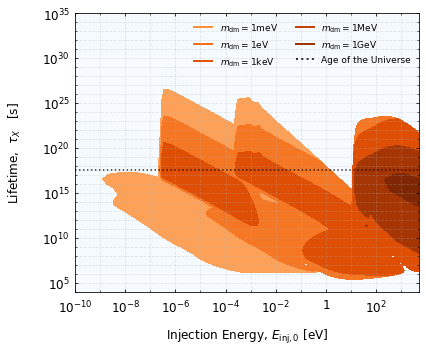

In [407]:
import matplotlib as mpl

fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 2


tau_values = Yf[:,0]
Einj_values = Xf[0]
Mf = np.log10((10**Zf/10**Einj_values)**-1)
#Einj_values =np.linspace(-10,5,500)
#tau_values = np.linspace(5,30,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

#levels = [3,6,9]

levels = [-3,0,3,6,9,100]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=10)


#bounds = levels
#colormap2 = mpl.cm.viridis
#norm = mpl.colors.BoundaryNorm(bounds, colormap2)

CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])


levels = [0,100]
CS2 = ax.contourf(Xf, Yf, Zf,levels,cmap = colormap2,norm=normalize,linestyles=['-'],alpha=1)



# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


name_ext = ''

if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '.pdf'

ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_ylim(tau_values[0],tau_values[-1])


#ax.yaxis.set_label_coords(-.08,0.5)
ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)

#im = ax.imshow(Mf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#           #cmap=colormap2,
#               norm=normalize, alpha=1.)


#im = ax.imshow(Mf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
#           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)

ax.set_xlim(Einj_values[0],np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,35)


ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])

        
#ax.text(-2, 33, 'Stimulated Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='blue', alpha=0.4))

ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(.5), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.6), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.7), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.9), lw=2,ls='-'),
                Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')]
ax.legend(custom_lines, [r'$m_\mathrm{dm}=1 \mathrm{meV}$', 
                          r'$m_\mathrm{dm}=1 \mathrm{eV}$', 
                         r'$m_\mathrm{dm}=1 \mathrm{keV}$', 
                         r'$m_\mathrm{dm}=1 \mathrm{MeV}$',
                         r'$m_\mathrm{dm}=1 \mathrm{GeV}$',
                        r'Age of the Universe'],loc=1,
        fontsize=9,ncol=2,
         frameon = False,
         facecolor='grey',framealpha=0.2)

ax.patch.set_color(colormap2(0.99)) # or whatever color you like
#ax.patch.set_alpha(.2)

ax.xaxis.set_label_coords(0.5,-0.13)


#cb = fig.colorbar(im,shrink=0.5)
#cb.set_label(r'$\log_{10} m_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
#plt.legend()
plt.savefig(path_to_figures + '/figures_for_paper_mdm_condition_with_edges.pdf')

In [408]:
# load the results
case = 'lyc+reio'
add_edges = 'yes'
name_ext = ''
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_stim_070920'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-5 if math.isnan(x) else x for x in Zf[:,i]]

#for i in range(200):
#    for j in range(200):
#        ej = 10**Xf[0][j]
#        mdm = (10**Zf[i][j]/ej)**-1
#        if mdm>ej:
#            Zf[i][j] = Zf[i][j]
#        else:
#            Zf[i][j] = -100#

tau_values = Yf[:,0]
Einj_values = Xf[0]

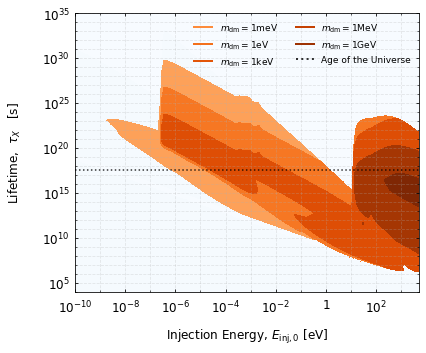

In [410]:
import matplotlib as mpl

fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 2


tau_values = Yf[:,0]
Einj_values = Xf[0]
Mf = np.log10((10**Zf/10**Einj_values)**-1)
#Einj_values =np.linspace(-10,5,500)
#tau_values = np.linspace(5,30,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

#levels = [3,6,9]

levels = [-3,0,3,6,9,100]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=10)


#bounds = levels
#colormap2 = mpl.cm.viridis
#norm = mpl.colors.BoundaryNorm(bounds, colormap2)

CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])


levels = [0,100]
CS2 = ax.contourf(Xf, Yf, Zf,levels,cmap = colormap2,norm=normalize,linestyles=['-'],alpha=1)



# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


name_ext = ''

if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '.pdf'

ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_ylim(tau_values[0],tau_values[-1])


#ax.yaxis.set_label_coords(-.08,0.5)
ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)

#im = ax.imshow(Mf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#           #cmap=colormap2,
#               norm=normalize, alpha=1.)


#im = ax.imshow(Mf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
#           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)

ax.set_xlim(Einj_values[0],np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,35)


ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])

        
#ax.text(-2, 33, 'Stimulated Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='blue', alpha=0.4))

ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(.5), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.6), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.7), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.9), lw=2,ls='-'),
                Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')]
ax.legend(custom_lines, [r'$m_\mathrm{dm}=1 \mathrm{meV}$', 
                          r'$m_\mathrm{dm}=1 \mathrm{eV}$', 
                         r'$m_\mathrm{dm}=1 \mathrm{keV}$', 
                         r'$m_\mathrm{dm}=1 \mathrm{MeV}$',
                         r'$m_\mathrm{dm}=1 \mathrm{GeV}$',
                        r'Age of the Universe'],loc=1,
        fontsize=9,ncol=2,
         frameon = False,
         facecolor='grey',framealpha=0.2)

ax.patch.set_color(colormap2(0.99)) # or whatever color you like
#ax.patch.set_alpha(.2)

ax.xaxis.set_label_coords(0.5,-0.13)


#cb = fig.colorbar(im,shrink=0.5)
#cb.set_label(r'$\log_{10} m_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
#plt.legend()
plt.savefig(path_to_figures + '/figures_for_paper_mdm_condition_stim_with_edges.pdf')